# You are what you eat - Relating Demographic Data to Food Consumption Habits

In [39]:
#%matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # needed for heatmap
from os.path import join
plt.rcParams['figure.figsize'] = [7, 5]

In [40]:
# define paths for data
FOLDER_PATH = 'data'
PURCHASES_PATH = 'area_level_purchases'
OSWARD_GROCERY = 'year_osward_grocery.csv'
WARD_ATLAS = 'ward-atlas-data.csv'

ward_data_path = join(FOLDER_PATH, PURCHASES_PATH, OSWARD_GROCERY)
atlas_data_path = join(FOLDER_PATH, WARD_ATLAS)

In [41]:
# load the data sets
df_ward = pd.read_csv(ward_data_path, sep=',', index_col=0)
df_atlas = pd.read_csv(atlas_data_path, sep=',', encoding='iso-8859-1')

In [42]:
df_atlas

Unnamed: 0 Unnamed: 1            Unnamed: 2         Unnamed: 3  \
0        Codes   New Code               Borough              Names   
1         00AA  E09000001        City of London     City of London   
2       00ABFX  E05000026  Barking and Dagenham              Abbey   
3       00ABFY  E05000027  Barking and Dagenham             Alibon   
4       00ABFZ  E05000028  Barking and Dagenham          Becontree   
..         ...        ...                   ...                ...   
624     00BKGU  E05000648           Westminster         Westbourne   
625     00BKGW  E05000649           Westminster           West End   
626         #1  E12000007                   NaN             London   
627         #2  E92000001                   NaN            England   
628         #3  K04000001                   NaN  England and Wales   

     Population and Age; Population Estimates and Projections; 2001  \
0                                                 2001                
1                                                 7350                
2                                                10350                
3                                                 9350                
4                                                11550                
..                                                 ...                
624                                              11150                
625                                               9000                
626                                            7336900                
627                                           49449700                
628                                           52360000                

     Population and Age; Population Estimates and Projections; 2006  \
0                                                 2006                
1                                                 7254                
2                                                10239                
3                                                 9236                
4                                                11238                
..                                                 ...                
624                                              12956                
625                                              11042                
626                                            7597825                
627                                           50965200                
628                                           53950854                

     Population and Age; Population Estimates and Projections; 2011  \
0                                                 2011                
1                                                 7400                
2                                                12900                
3                                                10450                
4                                                11650                
..                                                 ...                
624                                              12750                
625                                              10600                
626                                            8217450                
627                                           53107200                
628                                           56170927                

     Population and Age; Population Estimates and Projections; 2013  \
0                                                 2013                
1                                                 7993                
2                                                13806                
3                                                10527                
4                                                12155                
..                                                 ...                
624                                              12995                
625                                 

In [43]:
df_atlas.columns.values

array(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Population and Age; Population Estimates and Projections; 2001',
       'Population and Age; Population Estimates and Projections; 2006',
       'Population and Age; Population Estimates and Projections; 2011',
       'Population and Age; Population Estimates and Projections; 2013',
       'Population and Age; Population Estimates and Projections; 2014',
       'Population and Age; Population Estimates and Projections; 2015',
       'Population and Age; Population Estimates and Projections; 2016',
       'Population and Age; Population Estimates and Projections; 2018',
       'Population and Age; Population Estimates and Projections; 2023',
       'Population and Age; Population Estimates and Projections; 2028',
       'Population and Age; Age structure (percentage) - 2013; Aged 0-15',
       'Population and Age; Age structure (percentage) - 2013; Aged 16-64',
       'Population and Age; Age structure (percentage) -

In [44]:
print(f"Rows: {df_atlas.shape[0]}, Columns: {df_atlas.shape[1]} of df_atlas")

Rows: 629, Columns: 946 of df_atlas


The `df_atlas` data set looks very messy. Row 0 contains info about the data. For every ward and demographic marker yearly (from 2001 to 2006) values exist in columns. According to the [source](https://data.london.gov.uk/dataset/ward-profiles-and-atlas) this data set was collected in September 2015 with the most up-to-date information available. Thus, for many markers, the last available information dates to 2015 or even earlier (e.g. 2013). Our first step is to clean the data set from outdated columns and only keep the most up-to-date demographic markers.

As indicated by the title, we are interested in demographic markers which help classifying different classes of people. These are for example gender, religion, ethnicity, wealth, age. Thus, in the following, we drop columns which we deem not helpful in classifying people into groups. We acknowledge that this process can be rather biased, however, as the data set has 946 columns, we see the need to reduce the data set's complexity.

In [45]:
# clean age (columns after 2013 are projections, therefore keep 2013 columns)
cond = df_atlas.columns.str.startswith('Population and Age') & ~df_atlas.columns.str.contains('2013')
df_atlas = df_atlas.loc[:, ~cond]
# drop absolute population values
df_atlas = df_atlas.drop(['Population and Age; Population Estimates and Projections; 2013',
               'Population and Age; Aged 0-15; 2013',
               'Population and Age; Aged 16-64; 2013',
               'Population and Age; Aged 65+; 2013',
               'Population and Age; All ages; 2013',
               'Population and Age; Mean age; 2013',
               'Population and Age; Median age; 2013'], axis=1)
# delete population density
cond = df_atlas.columns.str.startswith('Area and Density')
df_atlas = df_atlas.loc[:, ~cond]
# delete the 18 ethnic groups for now, as they add complexity
cond = df_atlas.columns.str.startswith('Diversity; Ethnic Group 18 groups')
df_atlas = df_atlas.loc[:, ~cond]
# delete household language (of no interest) 
cond = df_atlas.columns.str.startswith('Diversity; Household Language - 2011 Census')
df_atlas = df_atlas.loc[:, ~cond]
# delete household composition data
cond = df_atlas.columns.str.startswith('Household composition')
df_atlas = df_atlas.loc[:, ~cond]
# delete household repossesion
cond = df_atlas.columns.str.startswith('Home repossessions')
df_atlas = df_atlas.loc[:, ~cond]
# delete outdated birth and death markers
cond = df_atlas.columns.str.startswith('Births and deaths')
df_atlas = df_atlas.loc[:, ~cond]
# delete outdated life expectancy
cond = df_atlas.columns.str.startswith('Life Expectancy')
df_atlas = df_atlas.loc[:, ~cond]
# delete outdated housing markers
cond = df_atlas.columns.str.startswith('Housing type and Tenure')
df_atlas = df_atlas.loc[:, ~cond]
cond = df_atlas.columns.str.startswith('House Prices')
df_atlas = df_atlas.loc[:, ~cond]
# delete tax related data (not of interest)
cond = df_atlas.columns.str.startswith('Dwellings and Council tax')
df_atlas = df_atlas.loc[:, ~cond]
# delete dwelling data which is not of interest
cond = df_atlas.columns.str.startswith('Property Type') | df_atlas.columns.str.startswith('Size of dwellings') | df_atlas.columns.str.startswith('Property build period')
df_atlas = df_atlas.loc[:, ~cond]
# delete outdated income data
cond = df_atlas.columns.str.startswith('Household Income') & ~df_atlas.columns.str.contains('2012/13')
df_atlas = df_atlas.loc[:, ~cond]
# outdated employment data
cond = df_atlas.columns.str.startswith('Employment')
df_atlas = df_atlas.loc[:, ~cond]
# delete benefits claimants and jobseekers allowance
cond = df_atlas.columns.str.startswith('Benefits claimants') | df_atlas.columns.str.startswith('Jobseekers Allowance')
df_atlas = df_atlas.loc[:, ~cond]
# delete out of work families
cond = df_atlas.columns.str.startswith('Out-of-Work Families')
df_atlas = df_atlas.loc[:, ~cond]
# outdated poverty
cond = df_atlas.columns.str.startswith('Children in Poverty')
df_atlas = df_atlas.loc[:, ~cond]
# outdated "intelligence" scores
cond = df_atlas.columns.str.startswith('GCSE')
df_atlas = df_atlas.loc[:, ~cond]
cond = df_atlas.columns.str.startswith('A-Level Point Scores')
df_atlas = df_atlas.loc[:, ~cond]
# pupil abscence not if interest
cond = df_atlas.columns.str.startswith('Pupil Absence')
df_atlas = df_atlas.loc[:, ~cond]
# individual crimes not of interest, only crime rate
cond = df_atlas.columns.str.startswith('Crime') # & ~df_atlas.columns.str.contains('Total crime rate; 2014/15')
df_atlas = df_atlas.loc[:, ~cond]
# further columns not of interest
cond = df_atlas.columns.str.startswith('Fires') | df_atlas.columns.str.startswith('Ambulance') \
| df_atlas.columns.str.startswith('Binge Drinking') | df_atlas.columns.str.startswith('Road Casualties') \
| df_atlas.columns.str.startswith('Air Emissions') | df_atlas.columns.str.startswith('Land Use') \
| df_atlas.columns.str.startswith('Access to green space and nature') | df_atlas.columns.str.startswith('Public Transport Accessibility')\
| df_atlas.columns.str.startswith('Car access') | df_atlas.columns.str.startswith('Travel to work by bicycle') \
| df_atlas.columns.str.startswith('Workplace employment') | df_atlas.columns.str.startswith('Nat Insurance No. registrations') \
| df_atlas.columns.str.startswith('Election turnout')
df_atlas = df_atlas.loc[:, ~cond]
# obesity already available in cleaned format
cond = df_atlas.columns.str.startswith('Childhood Obesity Prevalence')
df_atlas = df_atlas.loc[:, ~cond]
# delete old indices of deprivation
cond = df_atlas.columns.str.startswith('Indices of Deprivation') & ~df_atlas.columns.str.contains('2010')
df_atlas = df_atlas.loc[:, ~cond]

The indices of deprivation measure how deprived an area is [source](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/464597/English_Indices_of_Deprivation_2015_-_Research_Report.pdf). In essence, these indicators indicate how impoverished an area is. The linked documents lists the meaning of the different indices. *The average score measure summarises the average level of deprivation across the higher-level area,based on the scores of the Lower-layer Super Output Areas in the area.* Therefore, we decided to keep only this measure, as we are interested in an indicator of "average impoverishment".

In [46]:
cond = df_atlas.columns.str.startswith('Indices of Deprivation') & ~df_atlas.columns.str.endswith('Average Score; 2010')
df_atlas = df_atlas.loc[:, ~cond]

In [47]:
df_atlas.columns.values

array(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Population and Age; Age structure (percentage) - 2013; Aged 0-15',
       'Population and Age; Age structure (percentage) - 2013; Aged 16-64',
       'Population and Age; Age structure (percentage) - 2013; Aged 65+',
       'Diversity; Ethnic Group 5 groups - 2011 Census; White',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Mixed',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Other',
       'Diversity; Religion - 2011 Census; Christian',
       'Diversity; Religion - 2011 Census; Buddhist',
       'Diversity; Religion - 2011 Census; Hindu',
       'Diversity; Religion - 2011 Census; Jewish',
       'Diversity; Religion - 2011 Census; Muslim',
       'Diversity; Religion - 2011 Census; Sikh',
       'Diversity; Religion - 2011 Census; O

In [48]:
print(f"Rows: {df_atlas.shape[0]}, Columns: {df_atlas.shape[1]} of df_atlas")

Rows: 629, Columns: 37 of df_atlas


In [49]:
df_atlas.head(3)

Unnamed: 0 Unnamed: 1            Unnamed: 2      Unnamed: 3  \
0      Codes   New Code               Borough           Names   
1       00AA  E09000001        City of London  City of London   
2     00ABFX  E05000026  Barking and Dagenham           Abbey   

  Population and Age; Age structure (percentage) - 2013; Aged 0-15  \
0                                          Aged 0-15                 
1                                                7.5                 
2                                        25.27472527                 

  Population and Age; Age structure (percentage) - 2013; Aged 16-64  \
0                                         Aged 16-64                  
1                                               77.5                  
2                                        69.96336996                  

  Population and Age; Age structure (percentage) - 2013; Aged 65+  \
0                                           Aged 65+                
1                                                 15                
2                                        5.128205128                

  Diversity; Ethnic Group 5 groups - 2011 Census; White  \
0                                              White      
1                                               5799      
2                                               3596      

  Diversity; Ethnic Group 5 groups - 2011 Census; Mixed  \
0                                              Mixed      
1                                                289      
2                                                585      

  Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British  ...  \
0                             Asian or Asian British                      ...   
1                                                940                      ...   
2                                               5619                      ...   

  Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 2 qualifications  \
0  % Highest level of qualification: Level 2 qual...                                                                    
1                                                6.6                                                                    
2                                               11.5                                                                    

  Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Apprenticeship  \
0   % Highest level of qualification: Apprenticeship                                                            
1                                                0.7                                                            
2                                                1.1                                                            

  Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 3 qualifications  \
0  % Highest level of qualification: Level 3 qual...                                                                    
1                                                7.2                                                                    
2                                                8.5                                                                    

  Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 4 qualifications and above  \
0  % Highest level of qualification: Level 4 qual...                                                                              
1                                               68.4                                                                              
2                                               34.5                                                                              

  Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Other qualifications  \
0  % Highest level of qualificat

In [50]:
# The first 4 columns seem to have a wrong name
df_atlas.rename(columns={'Unnamed: 0': 'Codes', 'Unnamed: 1': 'New Code', 'Unnamed: 2': 'Borough' , 'Unnamed: 3': 'Names'}, inplace=True)

In [51]:
df_atlas

Codes   New Code               Borough              Names  \
0     Codes   New Code               Borough              Names   
1      00AA  E09000001        City of London     City of London   
2    00ABFX  E05000026  Barking and Dagenham              Abbey   
3    00ABFY  E05000027  Barking and Dagenham             Alibon   
4    00ABFZ  E05000028  Barking and Dagenham          Becontree   
..      ...        ...                   ...                ...   
624  00BKGU  E05000648           Westminster         Westbourne   
625  00BKGW  E05000649           Westminster           West End   
626      #1  E12000007                   NaN             London   
627      #2  E92000001                   NaN            England   
628      #3  K04000001                   NaN  England and Wales   

    Population and Age; Age structure (percentage) - 2013; Aged 0-15  \
0                                            Aged 0-15                 
1                                                  7.5                 
2                                          25.27472527                 
3                                          25.96153846                 
4                                          24.89626556                 
..                                                 ...                 
624                                        21.23552124                 
625                                        8.675799087                 
626                                        19.82387476                 
627                                        18.95309227                 
628                                        18.89198229                 

    Population and Age; Age structure (percentage) - 2013; Aged 16-64  \
0                                           Aged 16-64                  
1                                                 77.5                  
2                                          69.96336996                  
3                                          63.46153846                  
4                                          66.39004149                  
..                                                 ...                  
624                                        69.88416988                  
625                                         80.3652968                  
626                                        68.81515745                  
627                                        63.77216928                  
628                                        64.06230146                  

    Population and Age; Age structure (percentage) - 2013; Aged 65+  \
0                                             Aged 65+                
1                                                   15                
2                                          5.128205128                
3                                          10.57692308                
4                                          9.128630705                
..                                                 ...                
624                                        9.266409266                
625                                        10.95890411                
626                                        11.36037479                
627                                        17.27473845                
628                                        17.04571626                

    Diversity; Ethnic Group 5 groups - 2011 Census; White  \
0                                                White      
1                                                 5799      
2                                                 3596      
3                                                 7275      
4                                                 6789      
..                                                 ...      
624                                               6024      
625                                               7153      
626                                            4887435   

In [52]:
# the last three rows contain the demographic markers on country level and our not needed for our analysis
df_atlas.iloc[-3:]

Codes   New Code Borough              Names  \
626    #1  E12000007     NaN             London   
627    #2  E92000001     NaN            England   
628    #3  K04000001     NaN  England and Wales   

    Population and Age; Age structure (percentage) - 2013; Aged 0-15  \
626                                        19.82387476                 
627                                        18.95309227                 
628                                        18.89198229                 

    Population and Age; Age structure (percentage) - 2013; Aged 16-64  \
626                                        68.81515745                  
627                                        63.77216928                  
628                                        64.06230146                  

    Population and Age; Age structure (percentage) - 2013; Aged 65+  \
626                                        11.36037479                
627                                        17.27473845                
628                                        17.04571626                

    Diversity; Ethnic Group 5 groups - 2011 Census; White  \
626                                            4887435      
627                                           45281142      
628                                           48209395      

    Diversity; Ethnic Group 5 groups - 2011 Census; Mixed  \
626                                             405279      
627                                            1192879      
628                                            1224400      

    Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British  \
626                                            1511546                       
627                                            4143403                       
628                                            4213531                       

     ...  \
626  ...   
627  ...   
628  ...   

    Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 2 qualifications  \
626                                               11.8                                                                    
627                                        15.22370749                                                                    
628                                               15.3                                                                    

    Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Apprenticeship  \
626                                                1.6                                                            
627                                        3.565823564                                                            
628                                                3.6                                                            

    Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 3 qualifications  \
626                                               10.5                                                                    
627                                        12.35096053                                                                    
628                                               12.3                                                                    

    Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 4 qualifications and above  \
626                                               37.7                                                                              
627                                        27.37721571                                                                              
628                                               27.2                                                                              

    Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Oth

In [53]:
# delete the last three rows
df_atlas.drop(df_atlas.index[-3:], inplace=True)
df_atlas

Codes   New Code               Borough           Names  \
0     Codes   New Code               Borough           Names   
1      00AA  E09000001        City of London  City of London   
2    00ABFX  E05000026  Barking and Dagenham           Abbey   
3    00ABFY  E05000027  Barking and Dagenham          Alibon   
4    00ABFZ  E05000028  Barking and Dagenham       Becontree   
..      ...        ...                   ...             ...   
621  00BKGR  E05000645           Westminster       Tachbrook   
622  00BKGS  E05000646           Westminster  Vincent Square   
623  00BKGT  E05000647           Westminster         Warwick   
624  00BKGU  E05000648           Westminster      Westbourne   
625  00BKGW  E05000649           Westminster        West End   

    Population and Age; Age structure (percentage) - 2013; Aged 0-15  \
0                                            Aged 0-15                 
1                                                  7.5                 
2                                          25.27472527                 
3                                          25.96153846                 
4                                          24.89626556                 
..                                                 ...                 
621                                        10.84337349                 
622                                         14.0776699                 
623                                         10.9947644                 
624                                        21.23552124                 
625                                        8.675799087                 

    Population and Age; Age structure (percentage) - 2013; Aged 16-64  \
0                                           Aged 16-64                  
1                                                 77.5                  
2                                          69.96336996                  
3                                          63.46153846                  
4                                          66.39004149                  
..                                                 ...                  
621                                        74.09638554                  
622                                        72.81553398                  
623                                        76.96335079                  
624                                        69.88416988                  
625                                         80.3652968                  

    Population and Age; Age structure (percentage) - 2013; Aged 65+  \
0                                             Aged 65+                
1                                                   15                
2                                          5.128205128                
3                                          10.57692308                
4                                          9.128630705                
..                                                 ...                
621                                        15.06024096                
622                                        12.62135922                
623                                        12.04188482                
624                                        9.266409266                
625                                        10.95890411                

    Diversity; Ethnic Group 5 groups - 2011 Census; White  \
0                                                White      
1                                                 5799      
2                                                 3596      
3                                                 7275      
4                                                 6789      
..                                                 ...      
621                                               6376      
622                                               7059      
623                                               7122      
624                             

In [54]:
# row 0 od df_atlas seems to have column names and years in it, therefore, drop it
df_atlas.drop(df_atlas.index[0], inplace=True)
df_atlas

Codes   New Code               Borough           Names  \
1      00AA  E09000001        City of London  City of London   
2    00ABFX  E05000026  Barking and Dagenham           Abbey   
3    00ABFY  E05000027  Barking and Dagenham          Alibon   
4    00ABFZ  E05000028  Barking and Dagenham       Becontree   
5    00ABGA  E05000029  Barking and Dagenham  Chadwell Heath   
..      ...        ...                   ...             ...   
621  00BKGR  E05000645           Westminster       Tachbrook   
622  00BKGS  E05000646           Westminster  Vincent Square   
623  00BKGT  E05000647           Westminster         Warwick   
624  00BKGU  E05000648           Westminster      Westbourne   
625  00BKGW  E05000649           Westminster        West End   

    Population and Age; Age structure (percentage) - 2013; Aged 0-15  \
1                                                  7.5                 
2                                          25.27472527                 
3                                          25.96153846                 
4                                          24.89626556                 
5                                          24.13793103                 
..                                                 ...                 
621                                        10.84337349                 
622                                         14.0776699                 
623                                         10.9947644                 
624                                        21.23552124                 
625                                        8.675799087                 

    Population and Age; Age structure (percentage) - 2013; Aged 16-64  \
1                                                 77.5                  
2                                          69.96336996                  
3                                          63.46153846                  
4                                          66.39004149                  
5                                            60.591133                  
..                                                 ...                  
621                                        74.09638554                  
622                                        72.81553398                  
623                                        76.96335079                  
624                                        69.88416988                  
625                                         80.3652968                  

    Population and Age; Age structure (percentage) - 2013; Aged 65+  \
1                                                   15                
2                                          5.128205128                
3                                          10.57692308                
4                                          9.128630705                
5                                          15.27093596                
..                                                 ...                
621                                        15.06024096                
622                                        12.62135922                
623                                        12.04188482                
624                                        9.266409266                
625                                        10.95890411                

    Diversity; Ethnic Group 5 groups - 2011 Census; White  \
1                                                 5799      
2                                                 3596      
3                                                 7275      
4                                                 6789      
5                                                 6224      
..                                                 ...      
621                                               6376      
622                                               7059      
623                                               7122      
624                             

In [55]:
# can delete column `Codes` since this represents old area codes, the tesco data set is indexed by `New Code`
df_atlas = df_atlas.drop(['Codes'], axis=1)

In [56]:
df_atlas.columns.values

array(['New Code', 'Borough', 'Names',
       'Population and Age; Age structure (percentage) - 2013; Aged 0-15',
       'Population and Age; Age structure (percentage) - 2013; Aged 16-64',
       'Population and Age; Age structure (percentage) - 2013; Aged 65+',
       'Diversity; Ethnic Group 5 groups - 2011 Census; White',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Mixed',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British',
       'Diversity; Ethnic Group 5 groups - 2011 Census; Other',
       'Diversity; Religion - 2011 Census; Christian',
       'Diversity; Religion - 2011 Census; Buddhist',
       'Diversity; Religion - 2011 Census; Hindu',
       'Diversity; Religion - 2011 Census; Jewish',
       'Diversity; Religion - 2011 Census; Muslim',
       'Diversity; Religion - 2011 Census; Sikh',
       'Diversity; Religion - 2011 Census; Other religions',
       

In [57]:
# very long column names, rename columns to more concise names
import re
rename_map = {name: re.sub('.*; ', '', name) for name in df_atlas.columns.values}
# after inspection 'Household Income; Median Modelled Household income (£); 2012/13',
# 'Household Income; Mean Modelled Household income (£); 2012/13',
# 'Happiness and Well-being; Subjective well-being average score, 2011/12 and 2012/13; ',
# and 'Indices of Deprivation; Average Score; 2010' have been replaced too much, manually add those column names
rename_map['Household Income; Median Modelled Household income (£); 2012/13'] = 'Household Income Mean'
rename_map['Household Income; Mean Modelled Household income (£); 2012/13'] = 'Household Income Median'
rename_map['Happiness and Well-being; Subjective well-being average score, 2011/12 and 2012/13; '] = 'Well-Being'
rename_map['Indices of Deprivation; Average Score; 2010'] = 'IOD AVG'
df_atlas.rename(columns=rename_map, inplace=True)

In [58]:
# checking column type
df_atlas.dtypes

New Code                                                                    object
Borough                                                                     object
Names                                                                       object
Aged 0-15                                                                   object
Aged 16-64                                                                  object
Aged 65+                                                                    object
White                                                                       object
Mixed                                                                       object
Asian or Asian British                                                      object
Black or Black British                                                      object
Other                                                                       object
Christian                                                                   object
Budd

The values in the columns seem to be converted to objects instead of floats or ints, therefore convert these objects to numveric values where possible. None of these columns store string data (except the first three columns).

In [59]:
# to numeric conversion
df_atlas.loc[:, 'Aged 0-15':] = df_atlas.loc[:, 'Aged 0-15':].apply(pd.to_numeric, errors='coerce')
df_atlas.dtypes

New Code                                                                    object
Borough                                                                     object
Names                                                                       object
Aged 0-15                                                                  float64
Aged 16-64                                                                 float64
Aged 65+                                                                   float64
White                                                                        int64
Mixed                                                                        int64
Asian or Asian British                                                       int64
Black or Black British                                                       int64
Other                                                                        int64
Christian                                                                    int64
Budd

In [60]:
# checking for NA values
np.sum(df_atlas.isna())

New Code                                                                   0
Borough                                                                    0
Names                                                                      0
Aged 0-15                                                                  0
Aged 16-64                                                                 0
Aged 65+                                                                   0
White                                                                      0
Mixed                                                                      0
Asian or Asian British                                                     0
Black or Black British                                                     0
Other                                                                      0
Christian                                                                  0
Buddhist                                                                   0

In [61]:
# ethnicity as well as religion are given in absolute numbers, convert to relative percentages
religions = ['Christian', 'Buddhist', 'Hindu', 'Jewish', 'Muslim' , 'Sikh',\
             'Other religions', 'No religion', 'Religion not stated']

ethnicities = ['White', 'Mixed', 'Asian or Asian British', 'Black or Black British', 'Other']


def convert_to_relative(column, df, columns_subset):
    df[column + '_rel'] = df[column] / df[columns_subset].sum(axis=1)
    

In [62]:
df_atlas[religions]

Christian  Buddhist  Hindu  Jewish  Muslim  Sikh  Other religions  \
1         3344        92    145     166     409    18               28   
2         4703        67   1186      25    4412   493               46   
3         6389        54     64      20     640    29               34   
4         6345        89    272      35    1586   232               28   
5         5715        40    328      41    1042   278               27   
..         ...       ...    ...     ...     ...   ...              ...   
621       4653        85     64      75     718    11               36   
622       5388       137    143      91    1179    21               47   
623       5146       120    106      95     815    16               38   
624       5137       145    128     117    4225     8               70   
625       4558       211    265     485    1107    24               81   

     No religion  Religion not stated  
1           2522                  651  
2           1173                  681  
3           2466                  689  
4           2245                  713  
5           1896                  654  
..           ...                  ...  
621         1781                  735  
622         2029                  953  
623         2109                  924  
624         1867                 1062  
625         2850                  994  

[625 rows x 9 columns]

In [63]:
for religion in religions:
    convert_to_relative(religion, df_atlas, religions)
for ethnicity in ethnicities:
    convert_to_relative(ethnicity, df_atlas, ethnicities)

In [64]:
df_atlas[[r + '_rel' for r in religions]]

Christian_rel  Buddhist_rel  Hindu_rel  Jewish_rel  Muslim_rel  Sikh_rel  \
1         0.453424      0.012475   0.019661    0.022508    0.055458  0.002441   
2         0.367824      0.005240   0.092758    0.001955    0.345065  0.038558   
3         0.615214      0.005200   0.006163    0.001926    0.061627  0.002792   
4         0.549589      0.007709   0.023560    0.003032    0.137375  0.020095   
5         0.570302      0.003992   0.032731    0.004091    0.103982  0.027742   
..             ...           ...        ...         ...         ...       ...   
621       0.570360      0.010419   0.007845    0.009193    0.088012  0.001348   
622       0.539447      0.013716   0.014317    0.009111    0.118042  0.002103   
623       0.549258      0.012808   0.011314    0.010140    0.086989  0.001708   
624       0.402618      0.011365   0.010032    0.009170    0.331139  0.000627   
625       0.431017      0.019953   0.025059    0.045863    0.104681  0.002270   

     Other religions_rel  No religion_rel  Religion not stated_rel  
1               0.003797         0.341966                 0.088271  
2               0.003598         0.091741                 0.053261  
3               0.003274         0.237458                 0.066346  
4               0.002425         0.194456                 0.061758  
5               0.002694         0.189203                 0.065263  
..                   ...              ...                      ...  
621             0.004413         0.218313                 0.090096  
622             0.004706         0.203144                 0.095414  
623             0.004056         0.225104                 0.098623  
624             0.005486         0.146328                 0.083235  
625             0.007660         0.269504                 0.093995  

[625 rows x 9 columns]

In [65]:
df_atlas[[e + '_rel' for e in ethnicities]]

White_rel  Mixed_rel  Asian or Asian British_rel  \
1     0.786305   0.039186                    0.127458   
2     0.281245   0.045753                    0.439465   
3     0.700530   0.034858                    0.071545   
4     0.588047   0.045388                    0.174015   
5     0.621096   0.047201                    0.155673   
..         ...        ...                         ...   
621   0.781564   0.033342                    0.092425   
622   0.706748   0.045955                    0.125350   
623   0.760167   0.039065                    0.099370   
624   0.472137   0.066463                    0.141469   
625   0.676407   0.050307                    0.152435   

     Black or Black British_rel  Other_rel  
1                      0.026169   0.020881  
2                      0.204990   0.028547  
3                      0.182956   0.010111  
4                      0.177393   0.015158  
5                      0.158966   0.017064  
..                          ...        ...  
621                    0.053077   0.039593  
622                    0.072187   0.049760  
623                    0.052620   0.048778  
624                    0.147112   0.172819  
625                    0.041324   0.079527  

[625 rows x 5 columns]

In [66]:
for religion in religions:
    df_atlas[religion] = df_atlas[religion + '_rel']
    df_atlas.drop(religion + '_rel', inplace=True, axis=1)
for ethnicity in ethnicities:
    df_atlas[ethnicity] = df_atlas[ethnicity + '_rel']
    df_atlas.drop(ethnicity + '_rel', inplace=True, axis=1)

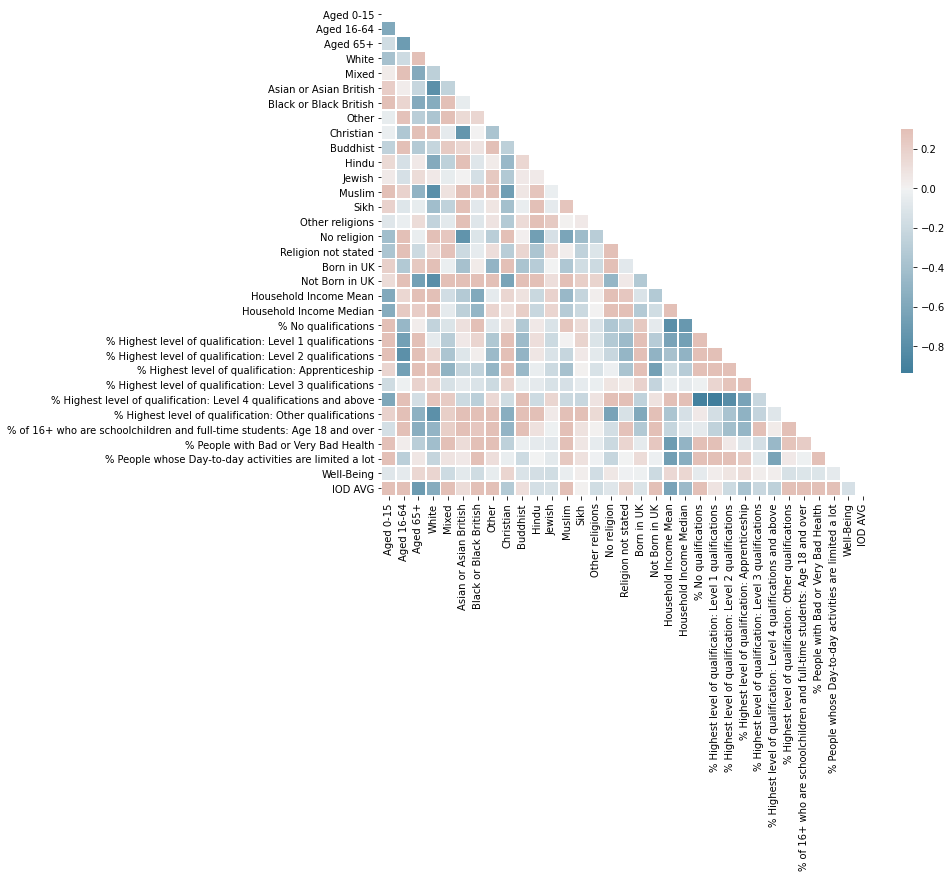

In [67]:
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = df_atlas.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [68]:
# before merging set index of df_atlas to the ward code
df_atlas.set_index('New Code', drop=True, inplace=True)

In [69]:
# merge the data sets by ward
df_ward_atlas = pd.merge(df_ward, df_atlas, how='inner', left_index=True, right_index=True, validate='1:1')
df_ward_atlas

weight  weight_perc2.5  weight_perc25  weight_perc50  \
E05000026  449.535137            32.5          166.4          300.0   
E05000027  413.130263            32.5          150.0          300.0   
E05000028  407.100472            32.5          160.0          300.0   
E05000029  384.173858            30.0          150.0          250.0   
E05000030  356.882607            30.0          140.0          250.0   
...               ...             ...            ...            ...   
E05000645  387.651694            38.0          168.0          300.0   
E05000646  391.296517            40.0          166.8          300.0   
E05000647  391.146713            38.0          175.0          320.0   
E05000648  400.832576            40.0          170.0          300.0   
E05000649  370.849508            40.0          154.0          280.0   

           weight_perc75  weight_perc97.5  weight_std  weight_ci95  \
E05000026          500.0           1500.0  771.349423     3.716832   
E05000027          500.0           1500.0  626.395178     5.164174   
E05000028          500.0           1200.0  545.890959     2.710677   
E05000029          454.0           1500.0  591.837557     4.968373   
E05000030          450.0           1000.0  465.284180     3.880963   
...                  ...              ...         ...          ...   
E05000645          500.0           1000.0  436.787372     2.983652   
E05000646          500.0           1000.0  451.042475     2.664696   
E05000647          500.0           1000.0  413.870008     3.021321   
E05000648          500.0           1200.0  468.173716     1.387756   
E05000649          480.0           1000.0  430.635180     2.157976   

               volume  volume_perc2.5  ...  \
E05000026  125.960833           11.00  ...   
E05000027  110.664114           15.00  ...   
E05000028  121.990710           11.00  ...   
E05000029  122.245578           11.00  ...   
E05000030  109.959688           13.69  ...   
...               ...             ...  ...   
E05000645  100.374890           11.00  ...   
E05000646  102.209867           10.10  ...   
E05000647  115.080184           11.00  ...   
E05000648  109.727023           11.00  ...   
E05000649   99.419205           11.00  ...   

           % Highest level of qualification: Level 2 qualifications  \
E05000026                                               11.5          
E05000027                                               15.7          
E05000028                                               15.3          
E05000029                                               14.9          
E05000030                                               16.5          
...                                                      ...          
E05000645                                                7.6          
E05000646                                                8.1          
E05000647                                                7.1          
E05000648                                                9.6          
E05000649                                                6.8          

           % Highest level of qualification: Apprenticeship  \
E05000026                                               1.1   
E05000027                                               1.8   
E05000028                                               2.0   
E05000029                                               2.2   
E05000030                                               2.8   
...                                                     ...   
E05000645                                               0.9   
E05000646                                               0.9   
E05000647                                               1.0   
E05000648                                               0.8   
E05000649                                               0.6   

           % Highest level of qualification: Level 3 qualifications  \
E05000026                                                8.5          
E05000027       

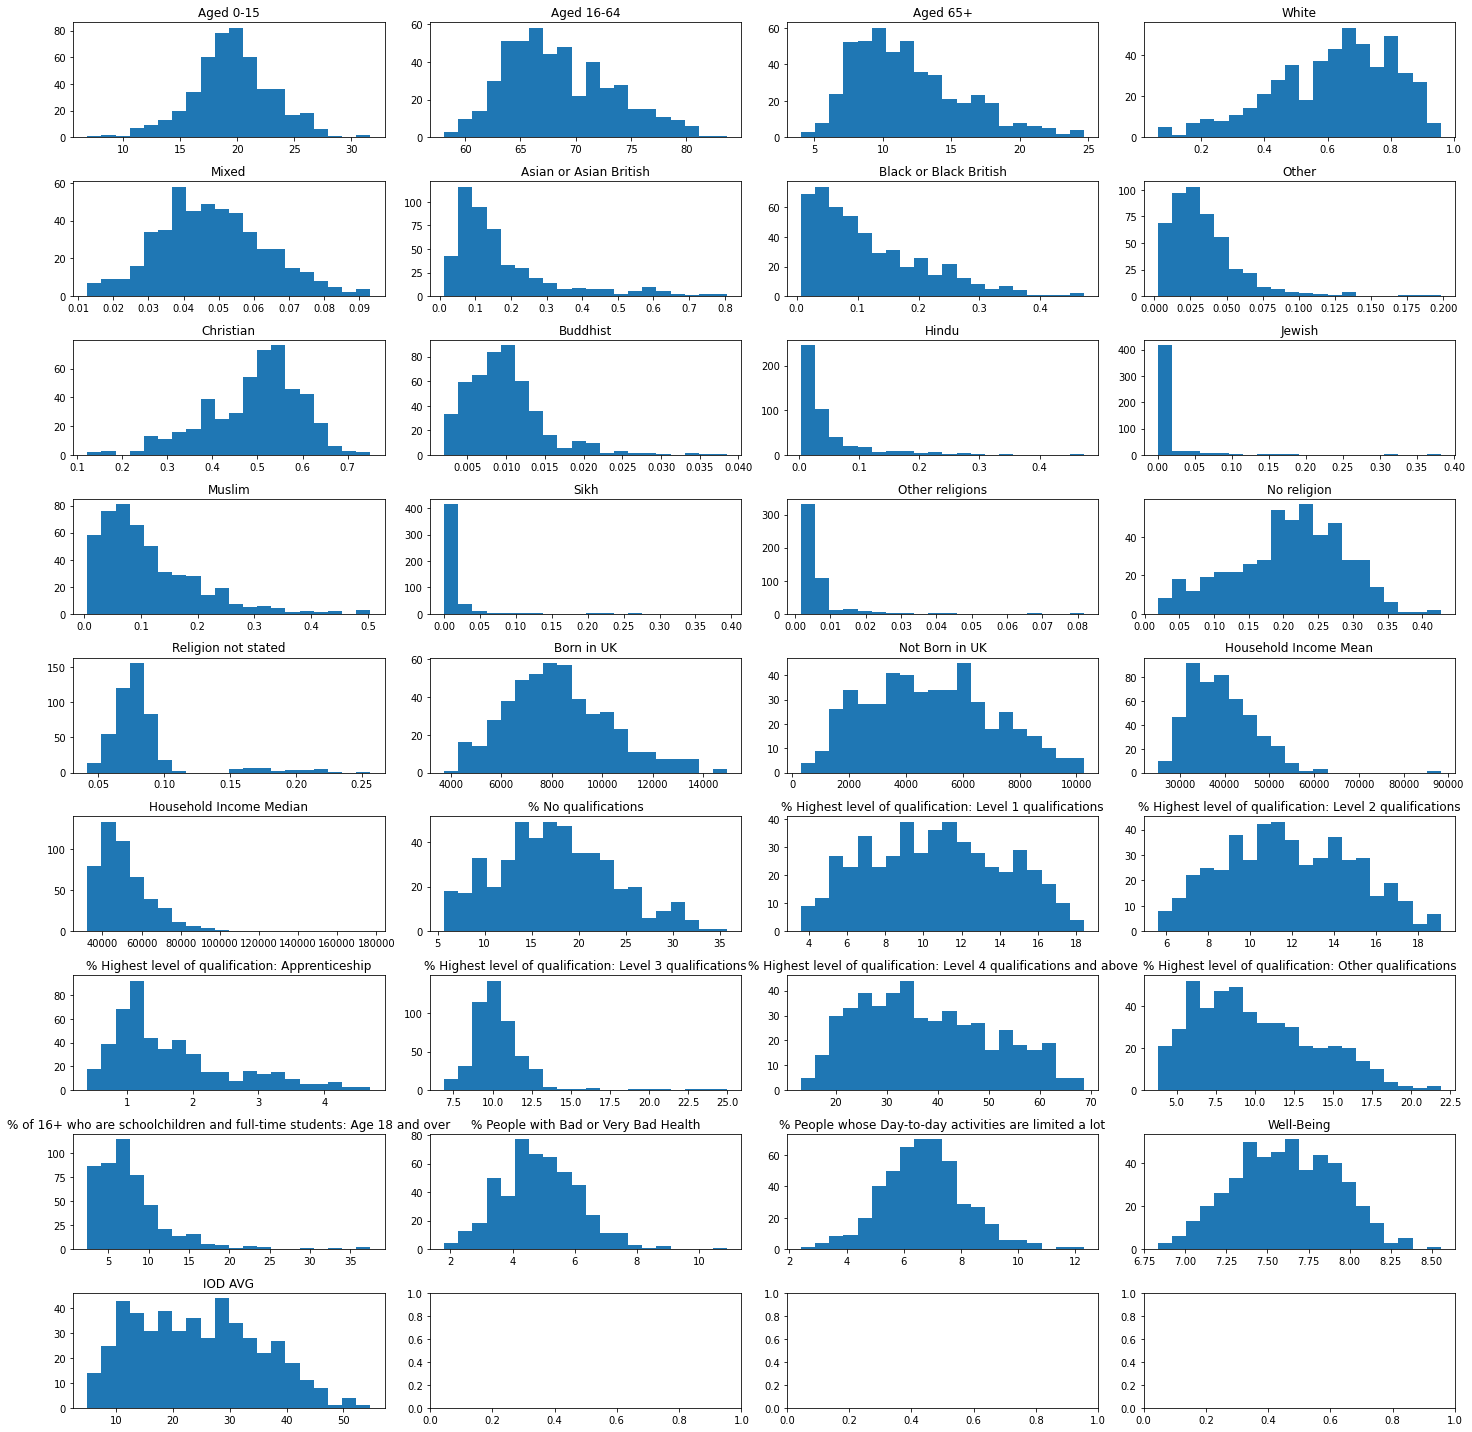

In [70]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].hist(df_ward_atlas[column], bins=20)
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

The distribution of many features seem to very skewed, thus we apply a log-transformation to every feature.

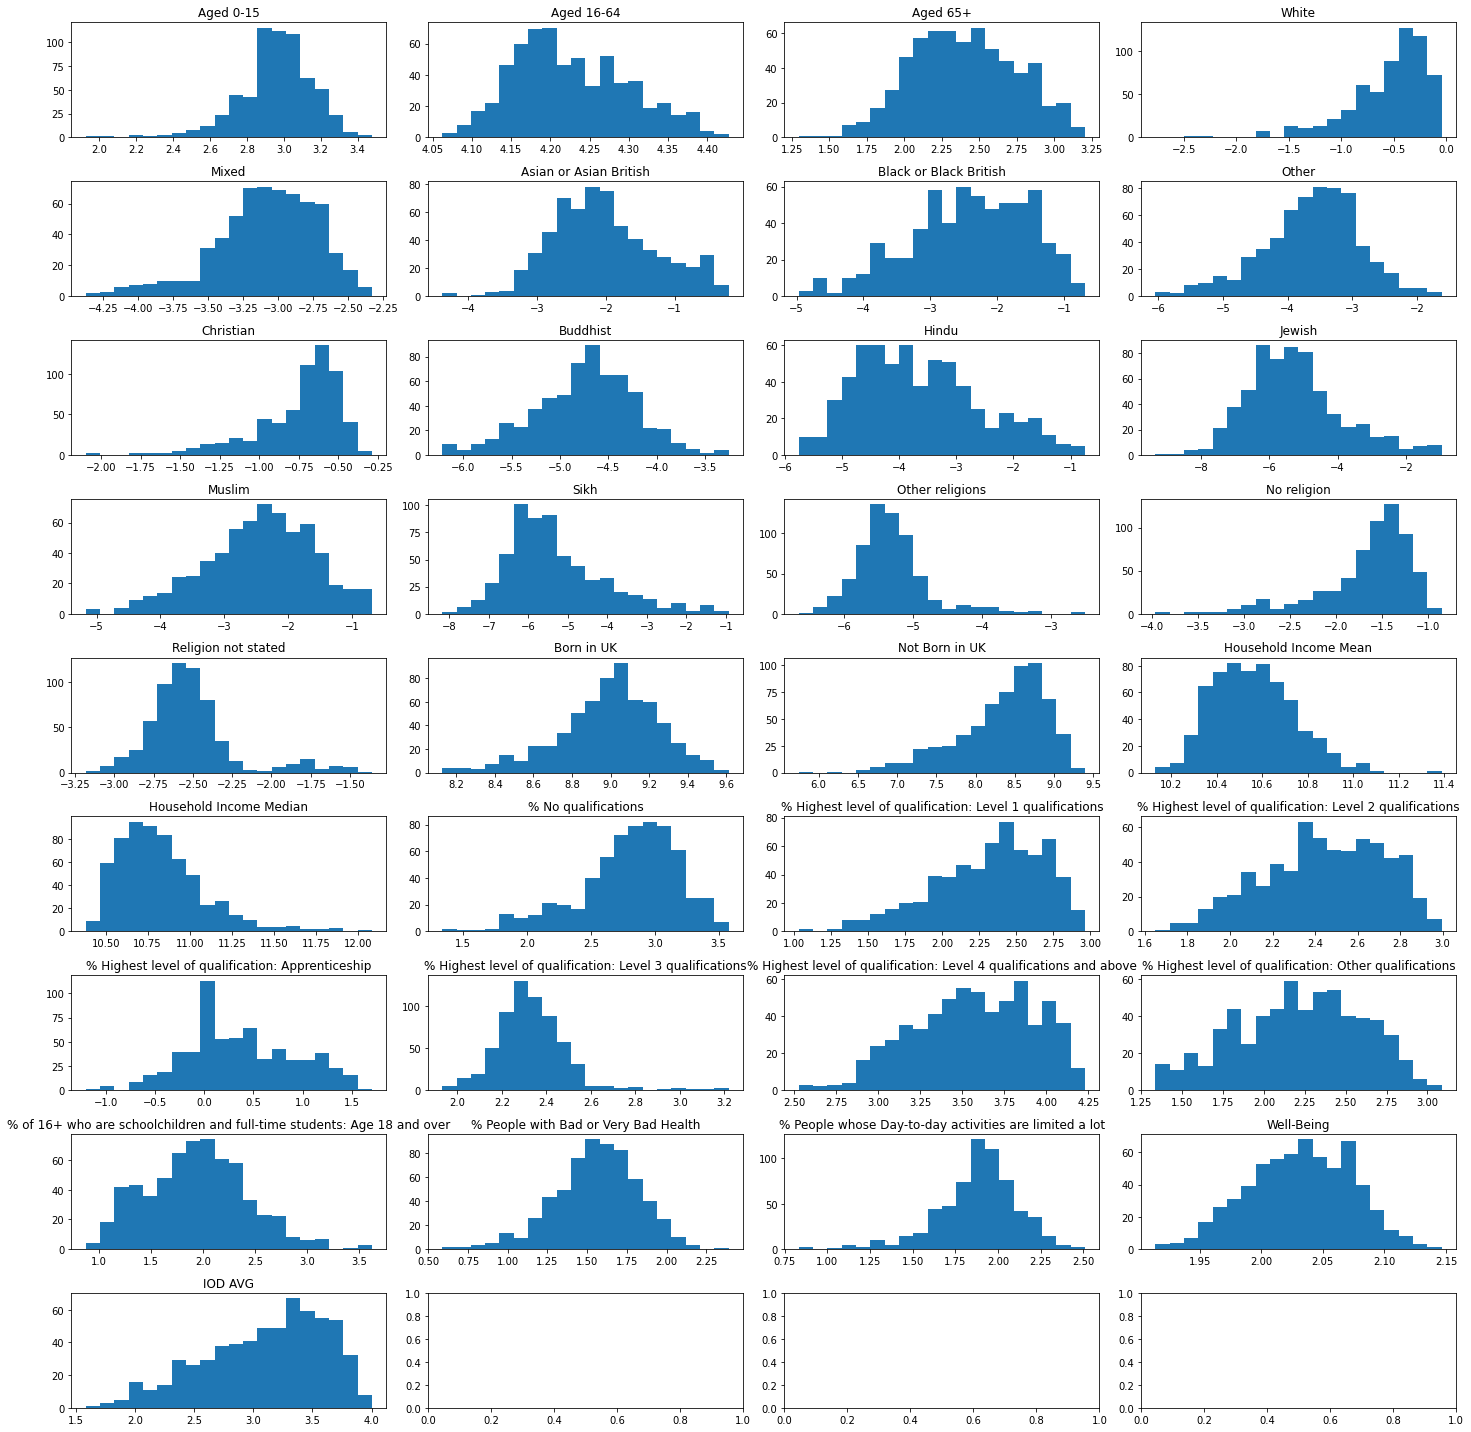

In [71]:
df_atlas_log = df_atlas.iloc[:, 2:].apply(np.log)

# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas_log.columns.values):
    axs_flat[idx].hist(df_atlas_log[column], bins=20)
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

## no log transform

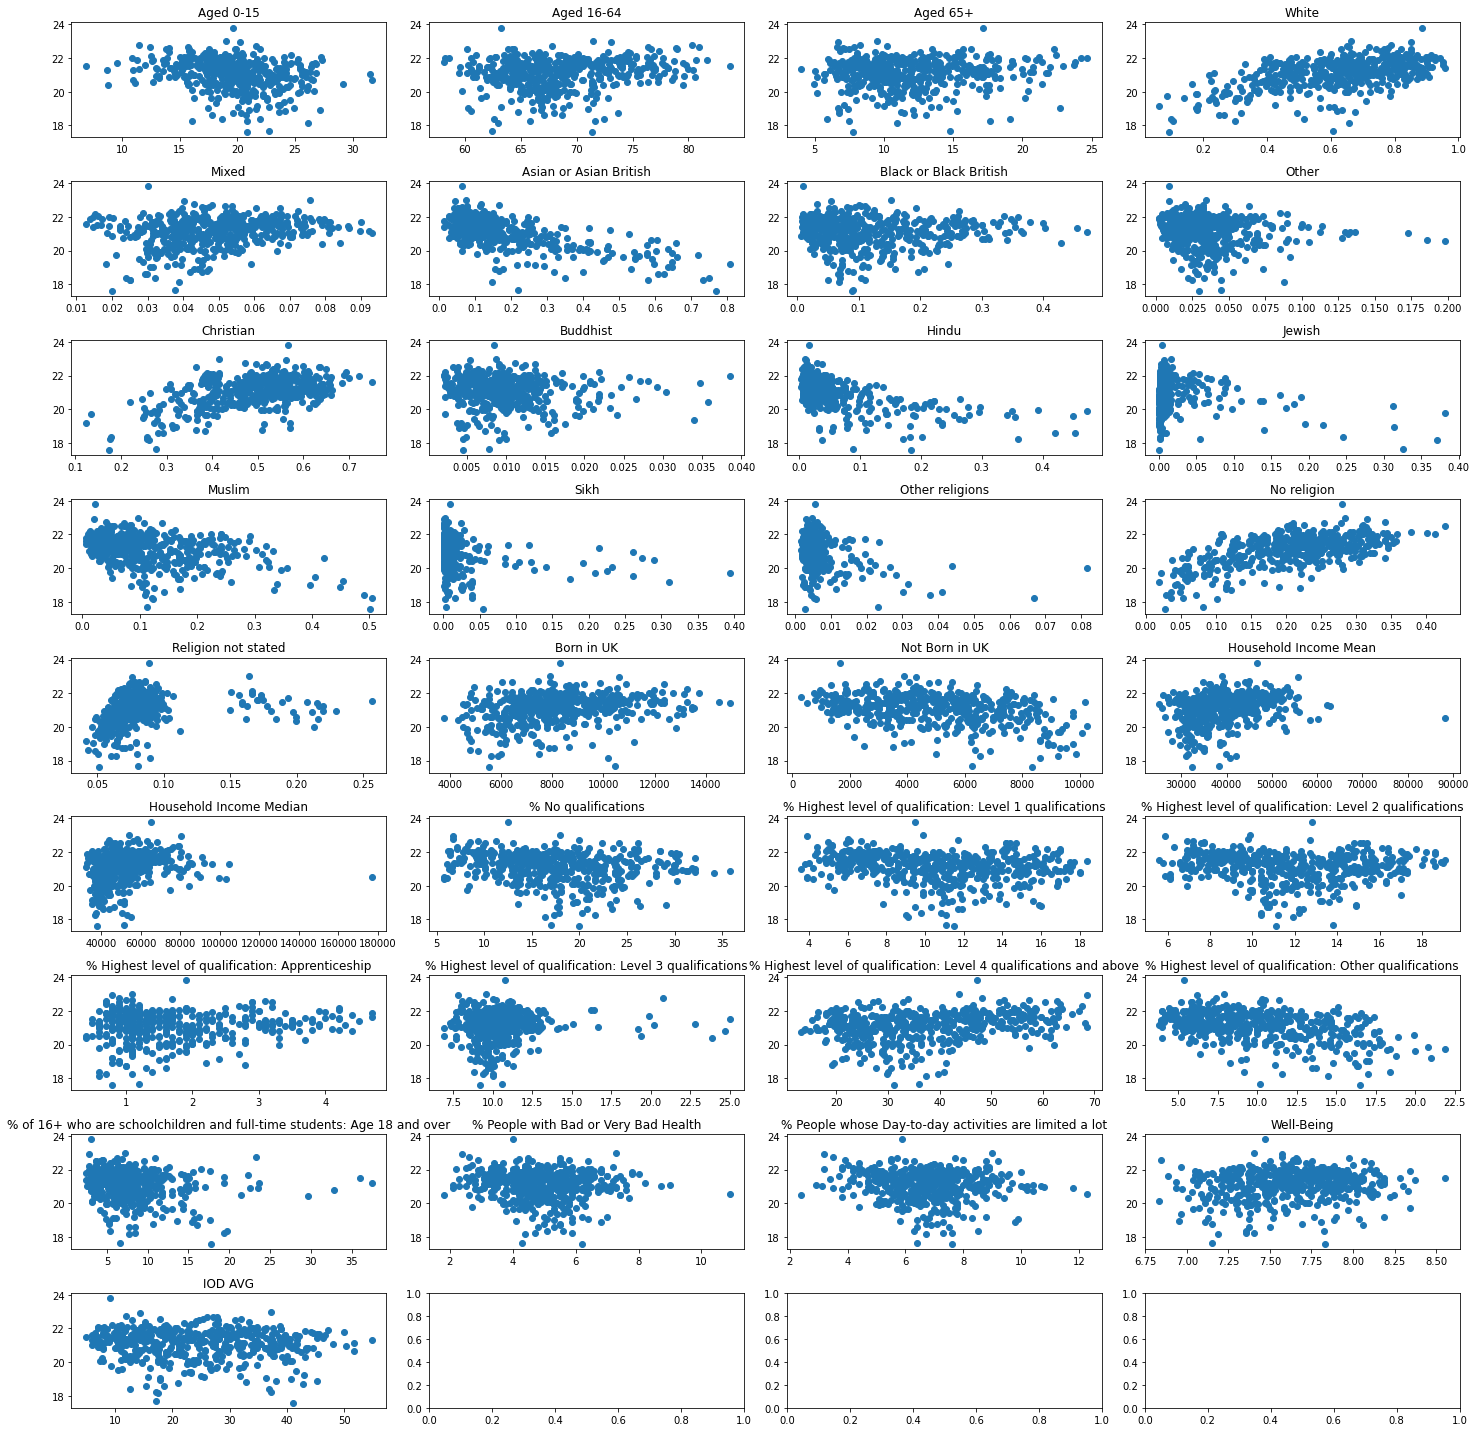

In [72]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas[column], df_ward_atlas['energy_protein'])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

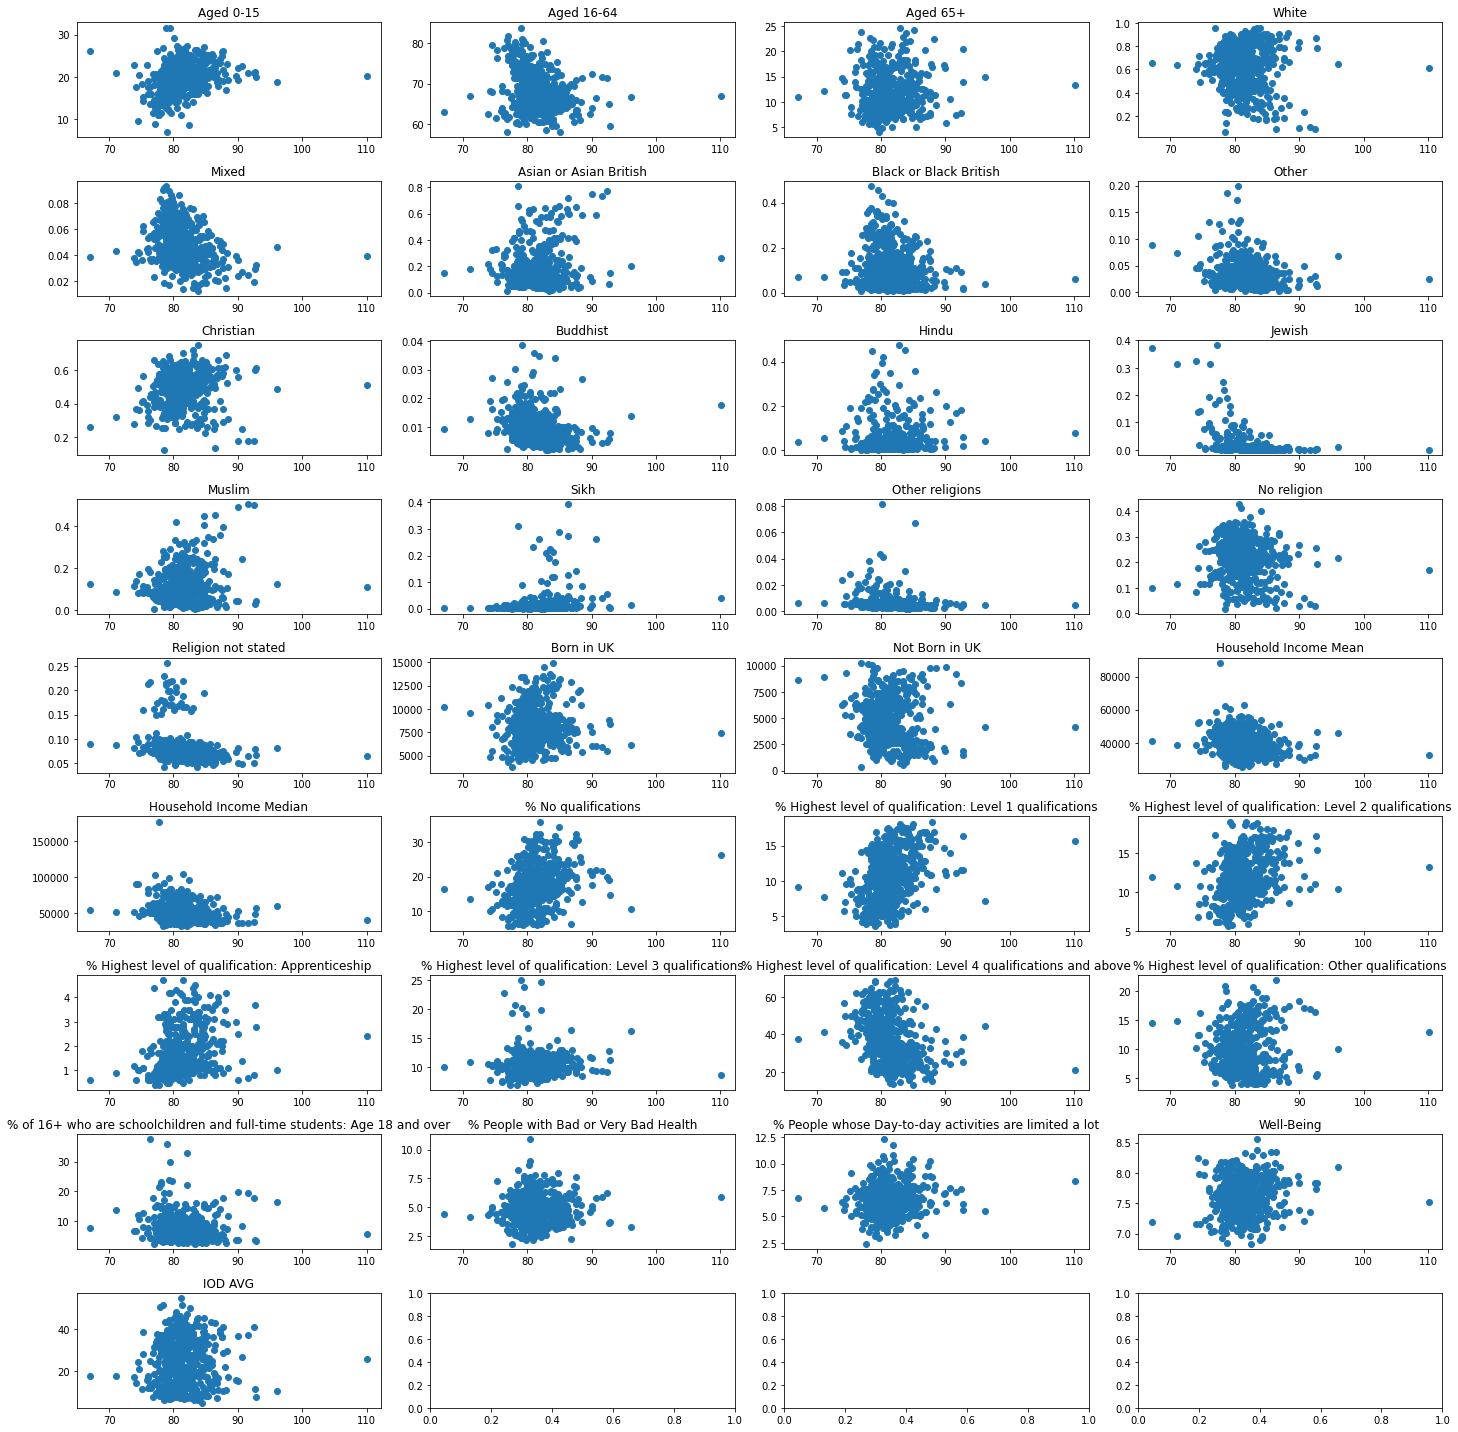

In [73]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas['energy_fat'], df_ward_atlas[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

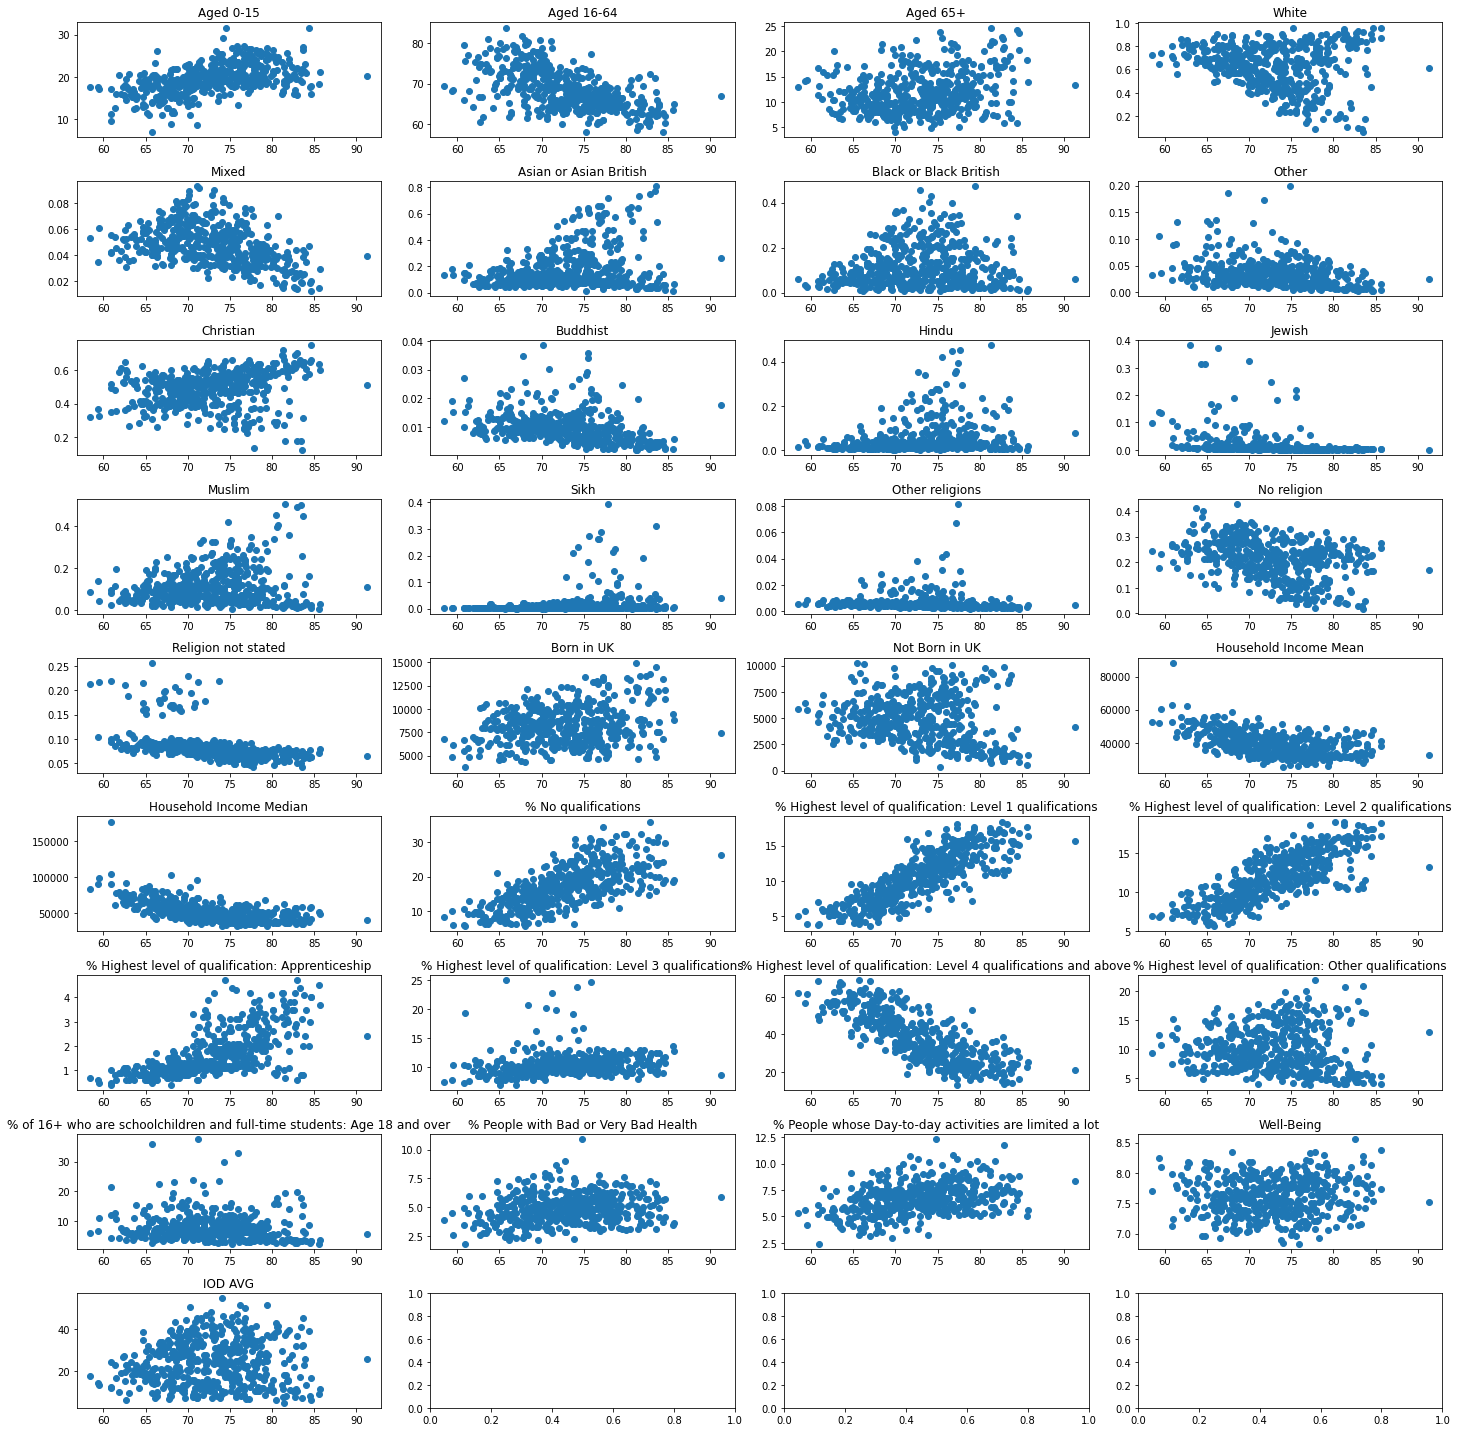

In [74]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas['energy_carb'], df_ward_atlas[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

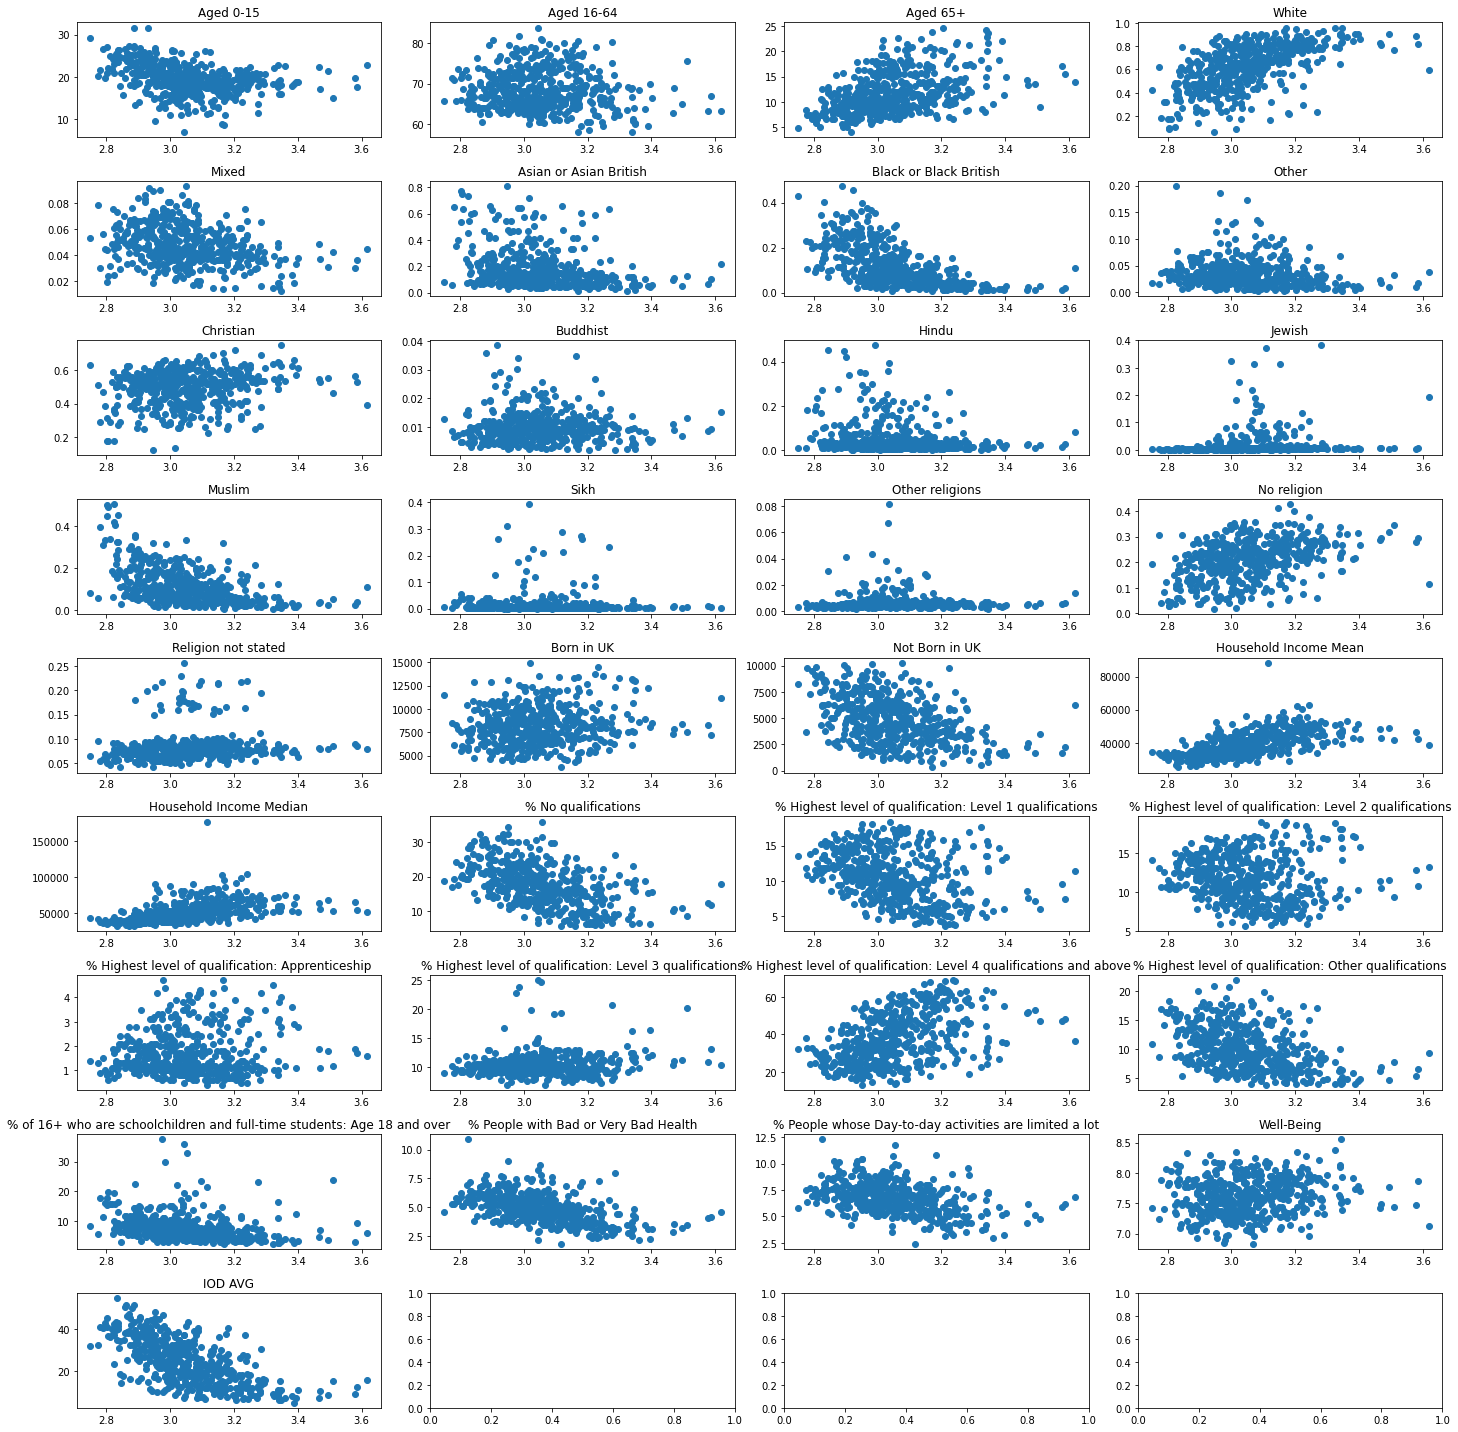

In [75]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas['energy_fibre'], df_ward_atlas[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

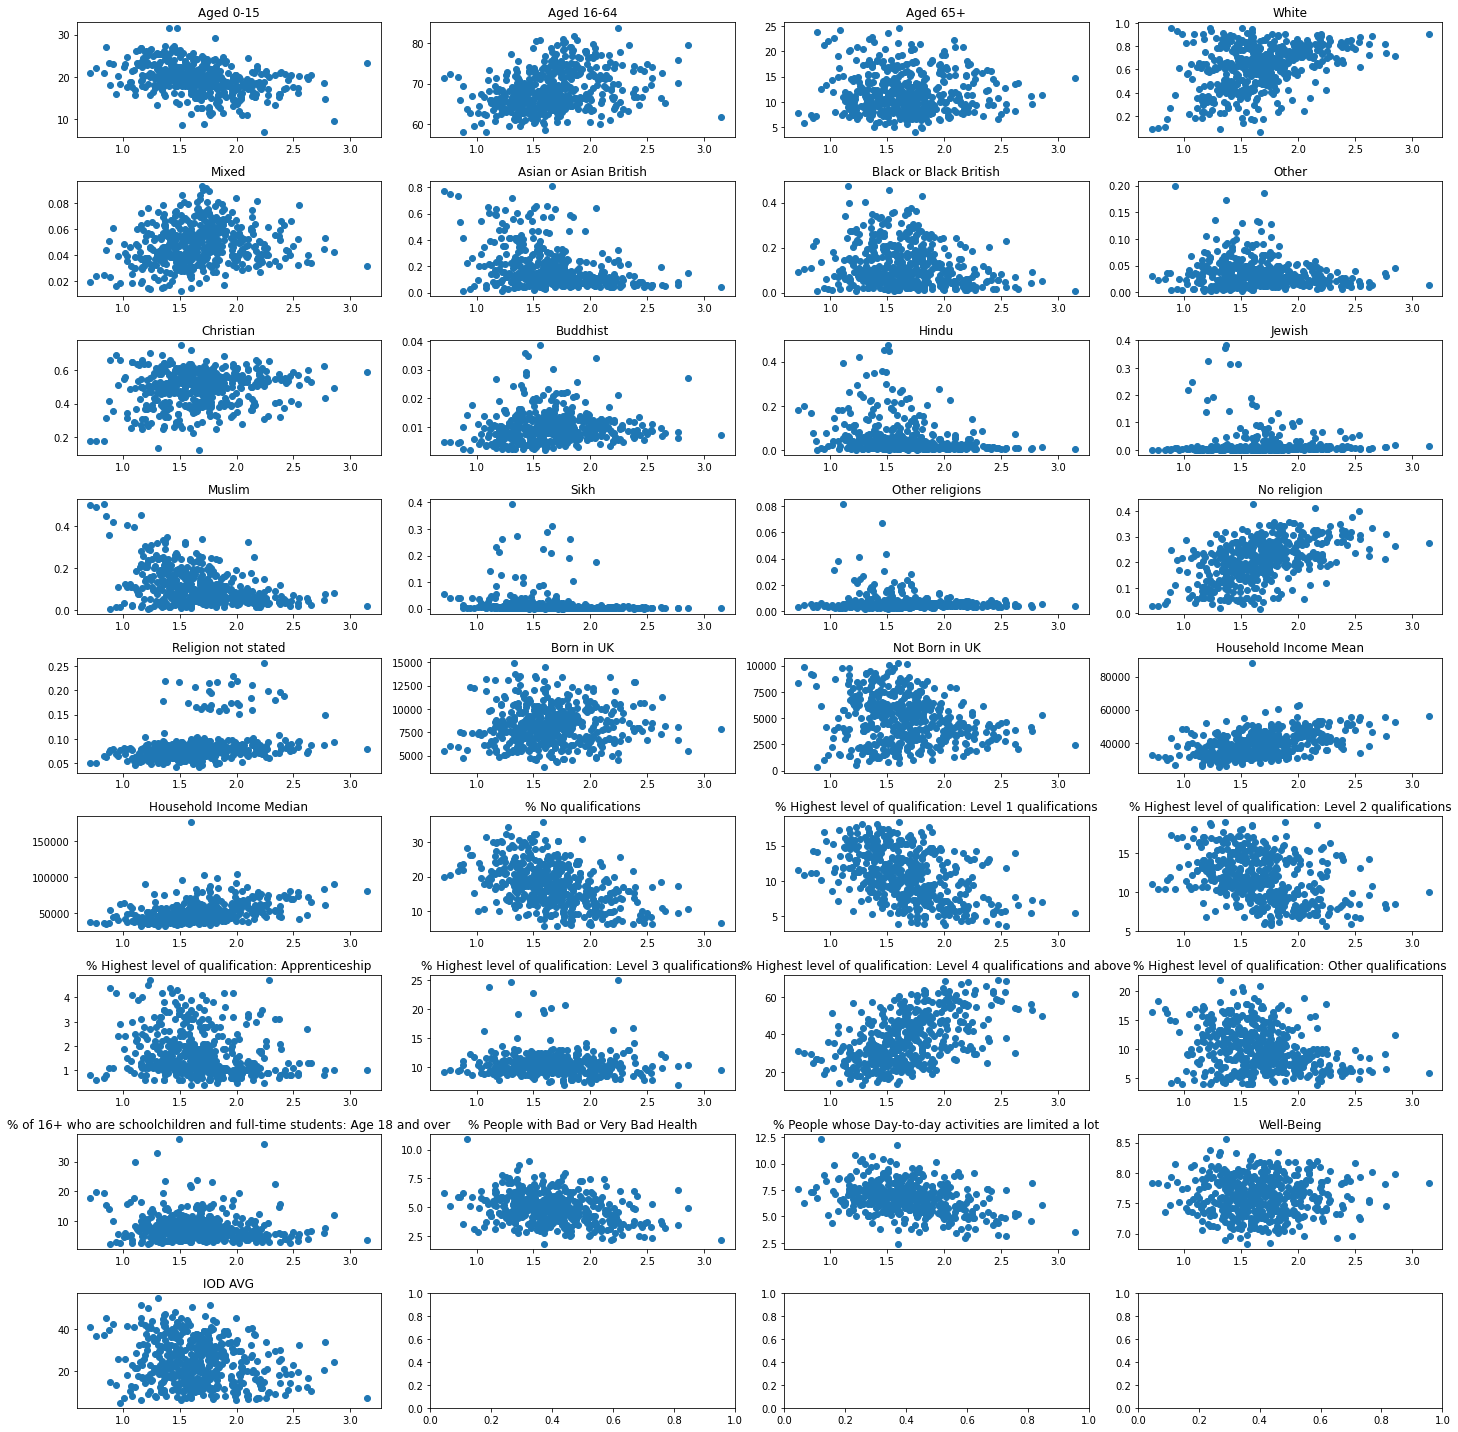

In [76]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas['energy_alcohol'], df_ward_atlas[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

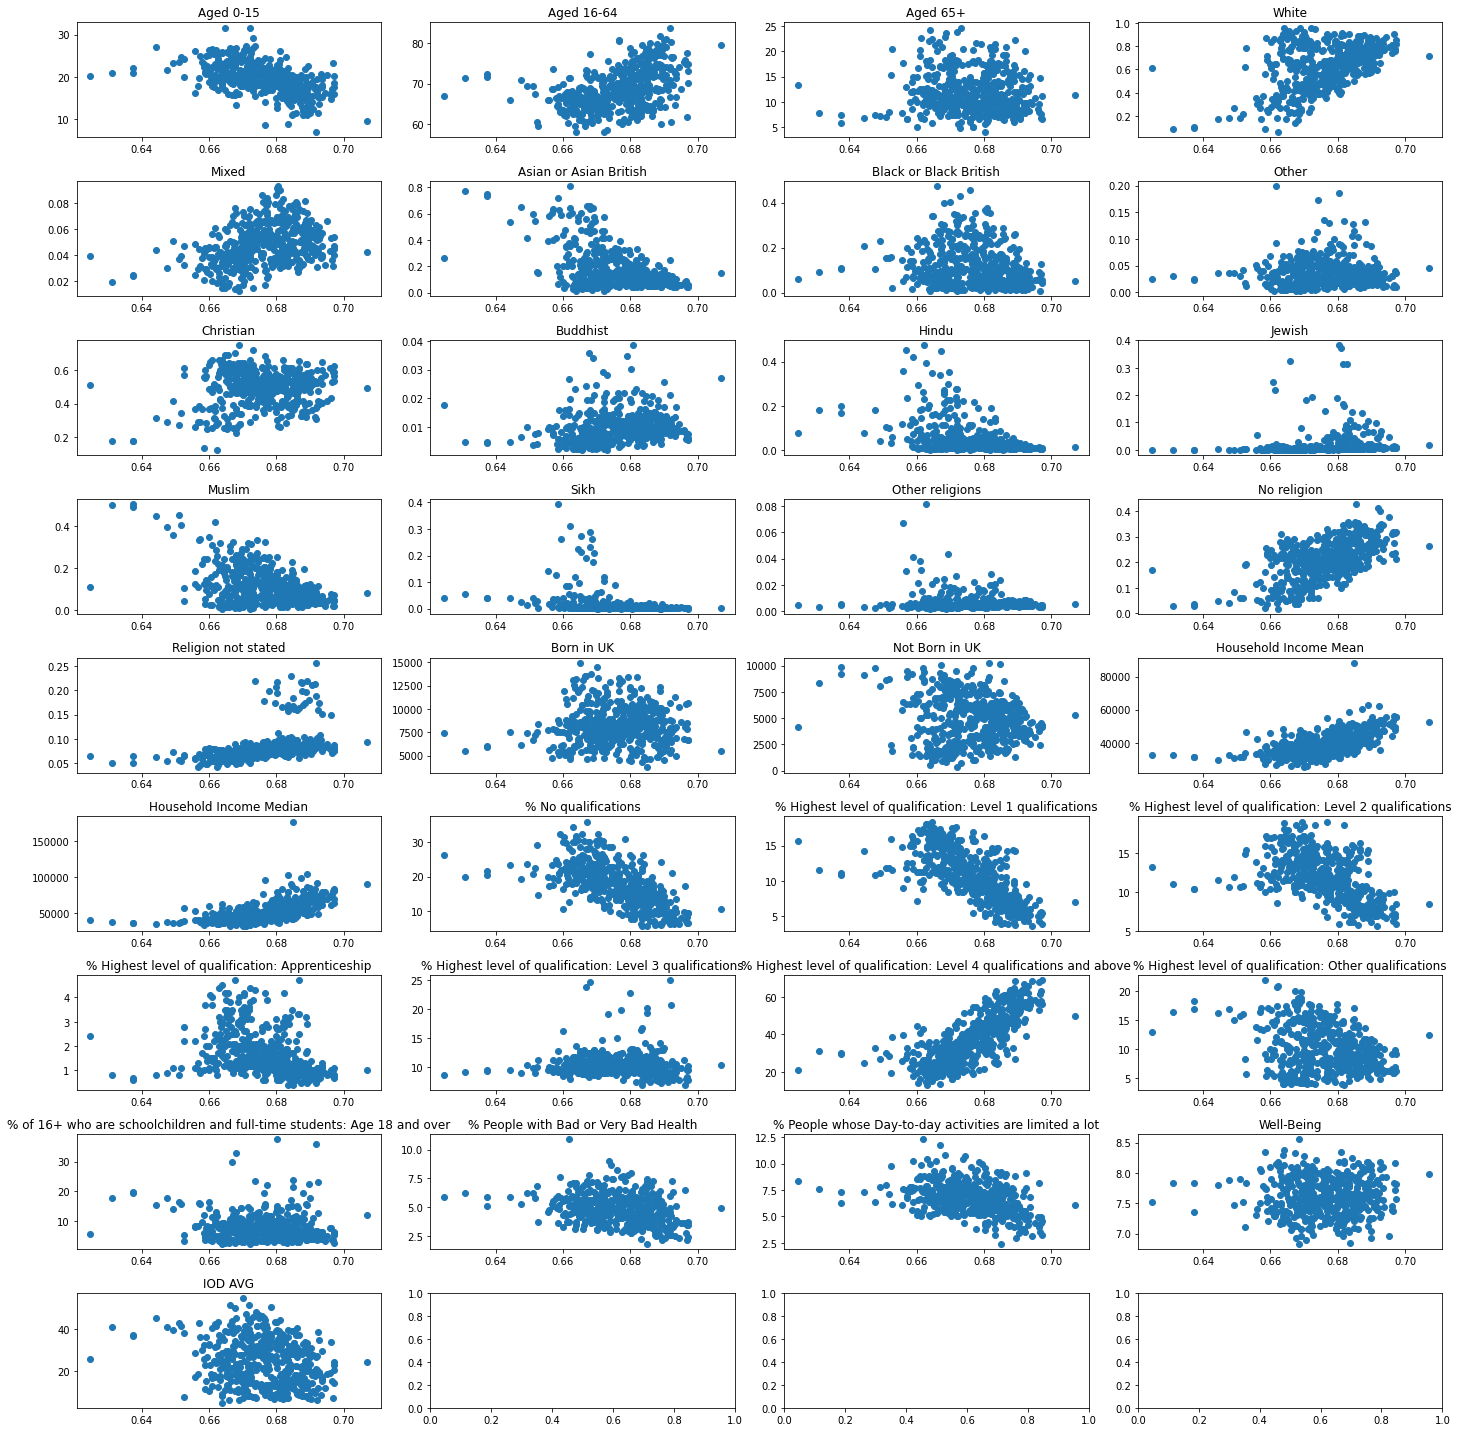

In [77]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas['h_nutrients_calories_norm'], df_ward_atlas[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

## with log transform

In [78]:
# merge the data sets by ward
df_ward_atlas_log = pd.merge(df_ward, df_atlas_log, how='inner', left_index=True, right_index=True, validate='1:1')

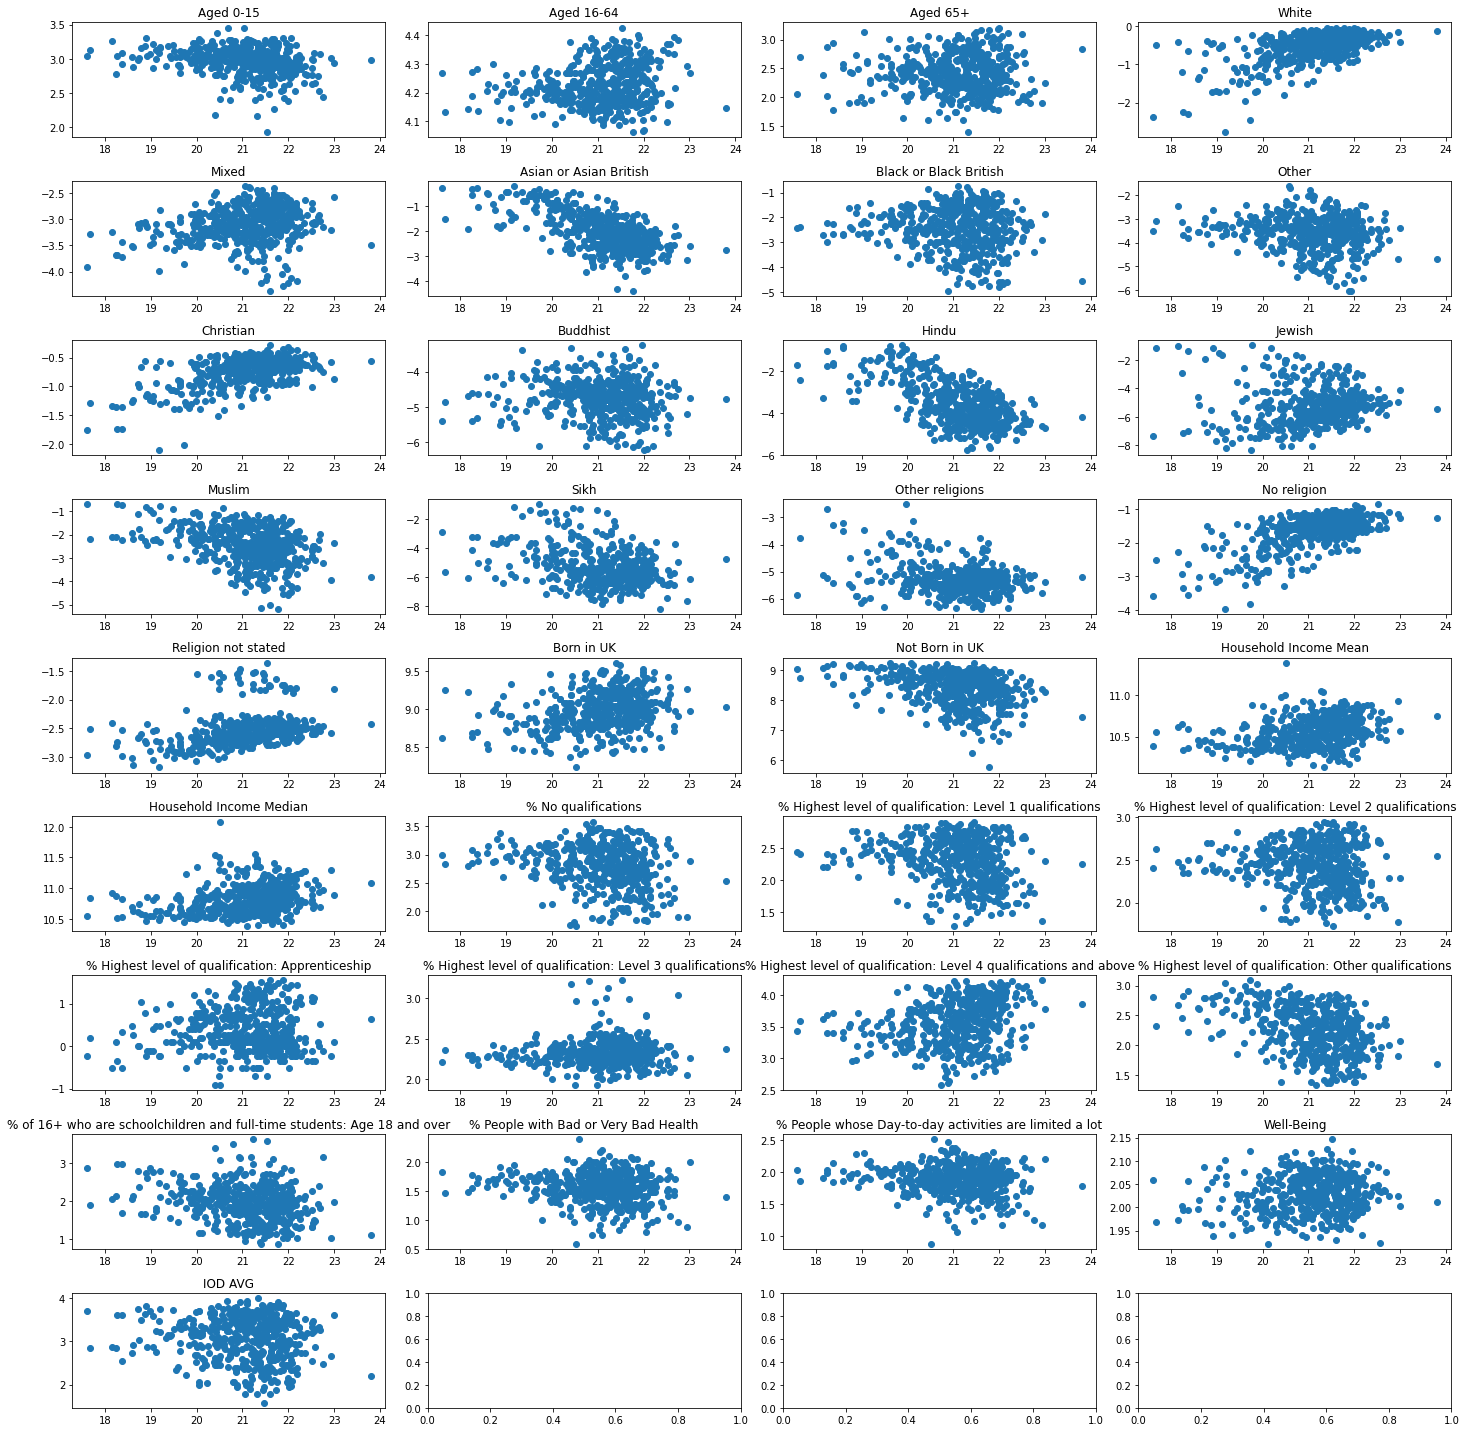

In [79]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas_log['energy_protein'], df_ward_atlas_log[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

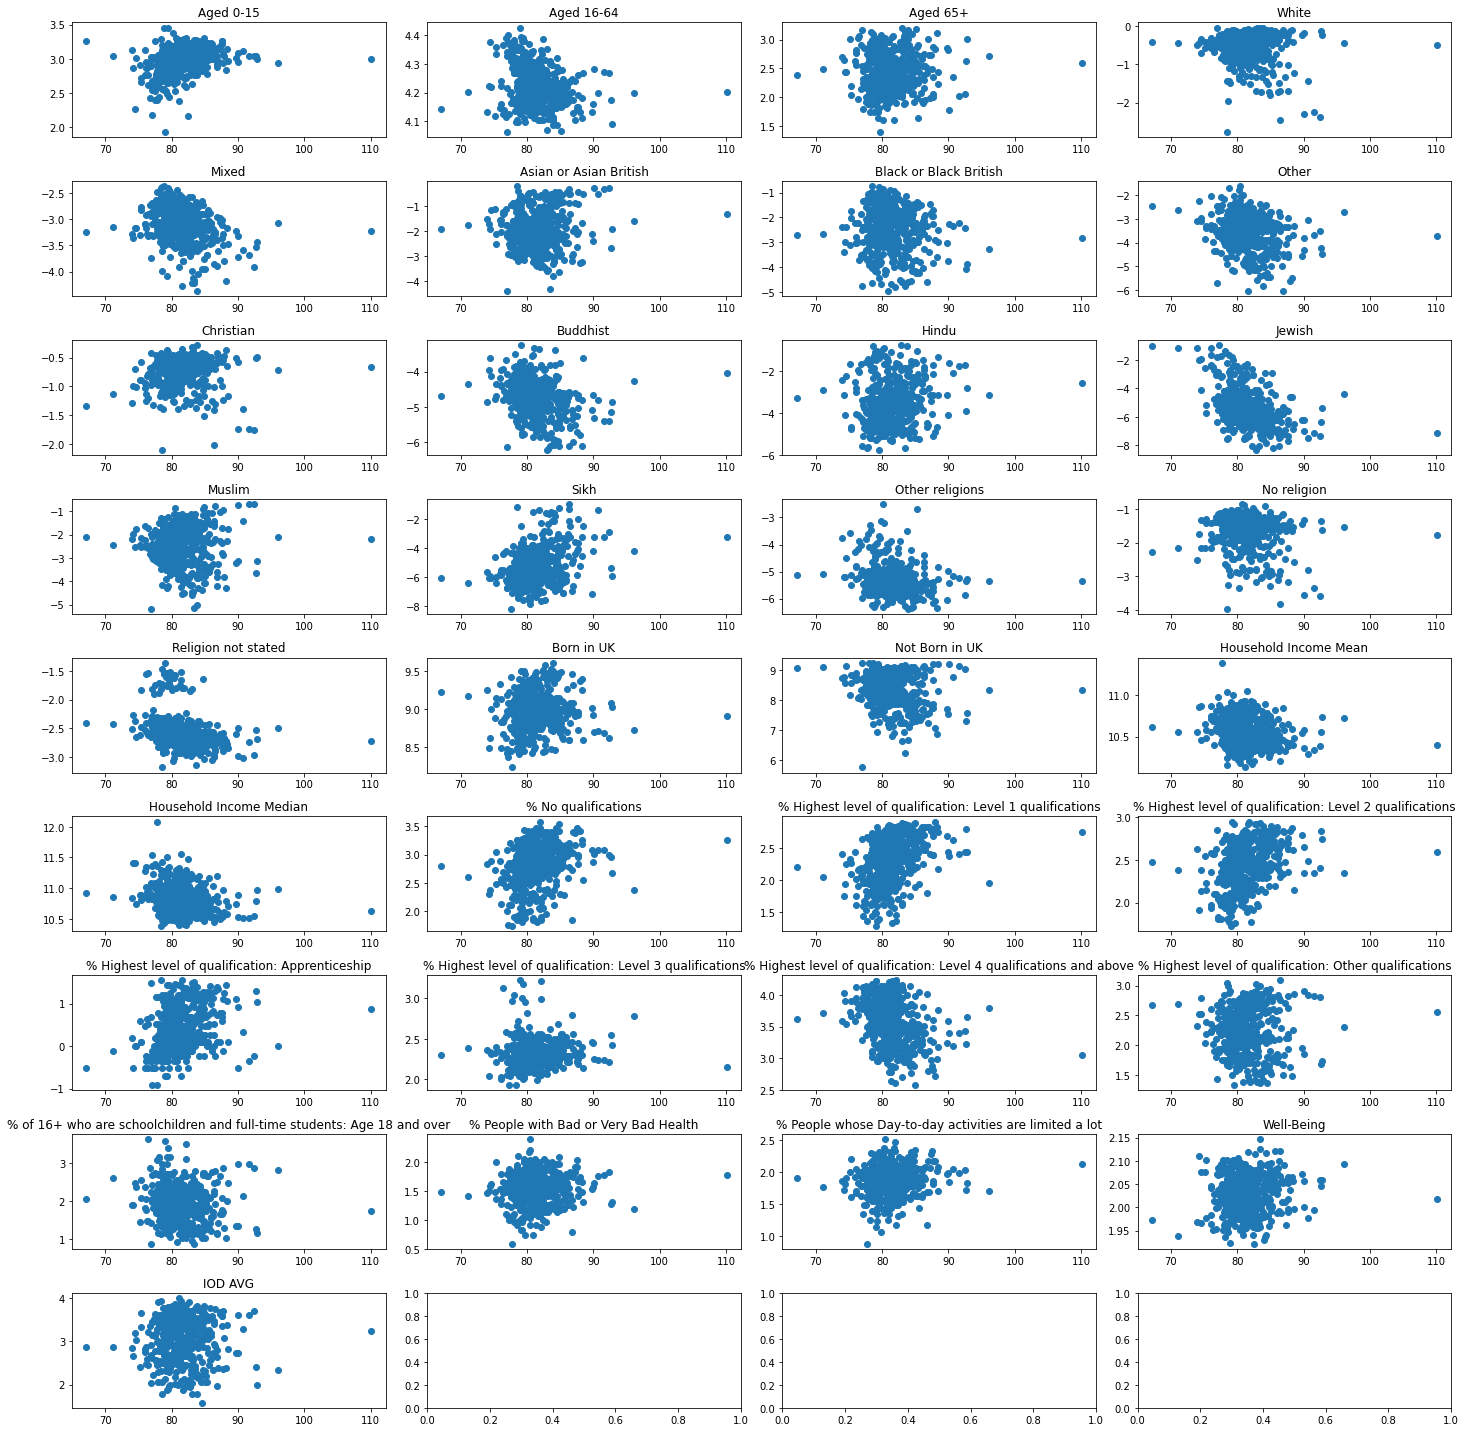

In [80]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas_log['energy_fat'], df_ward_atlas_log[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

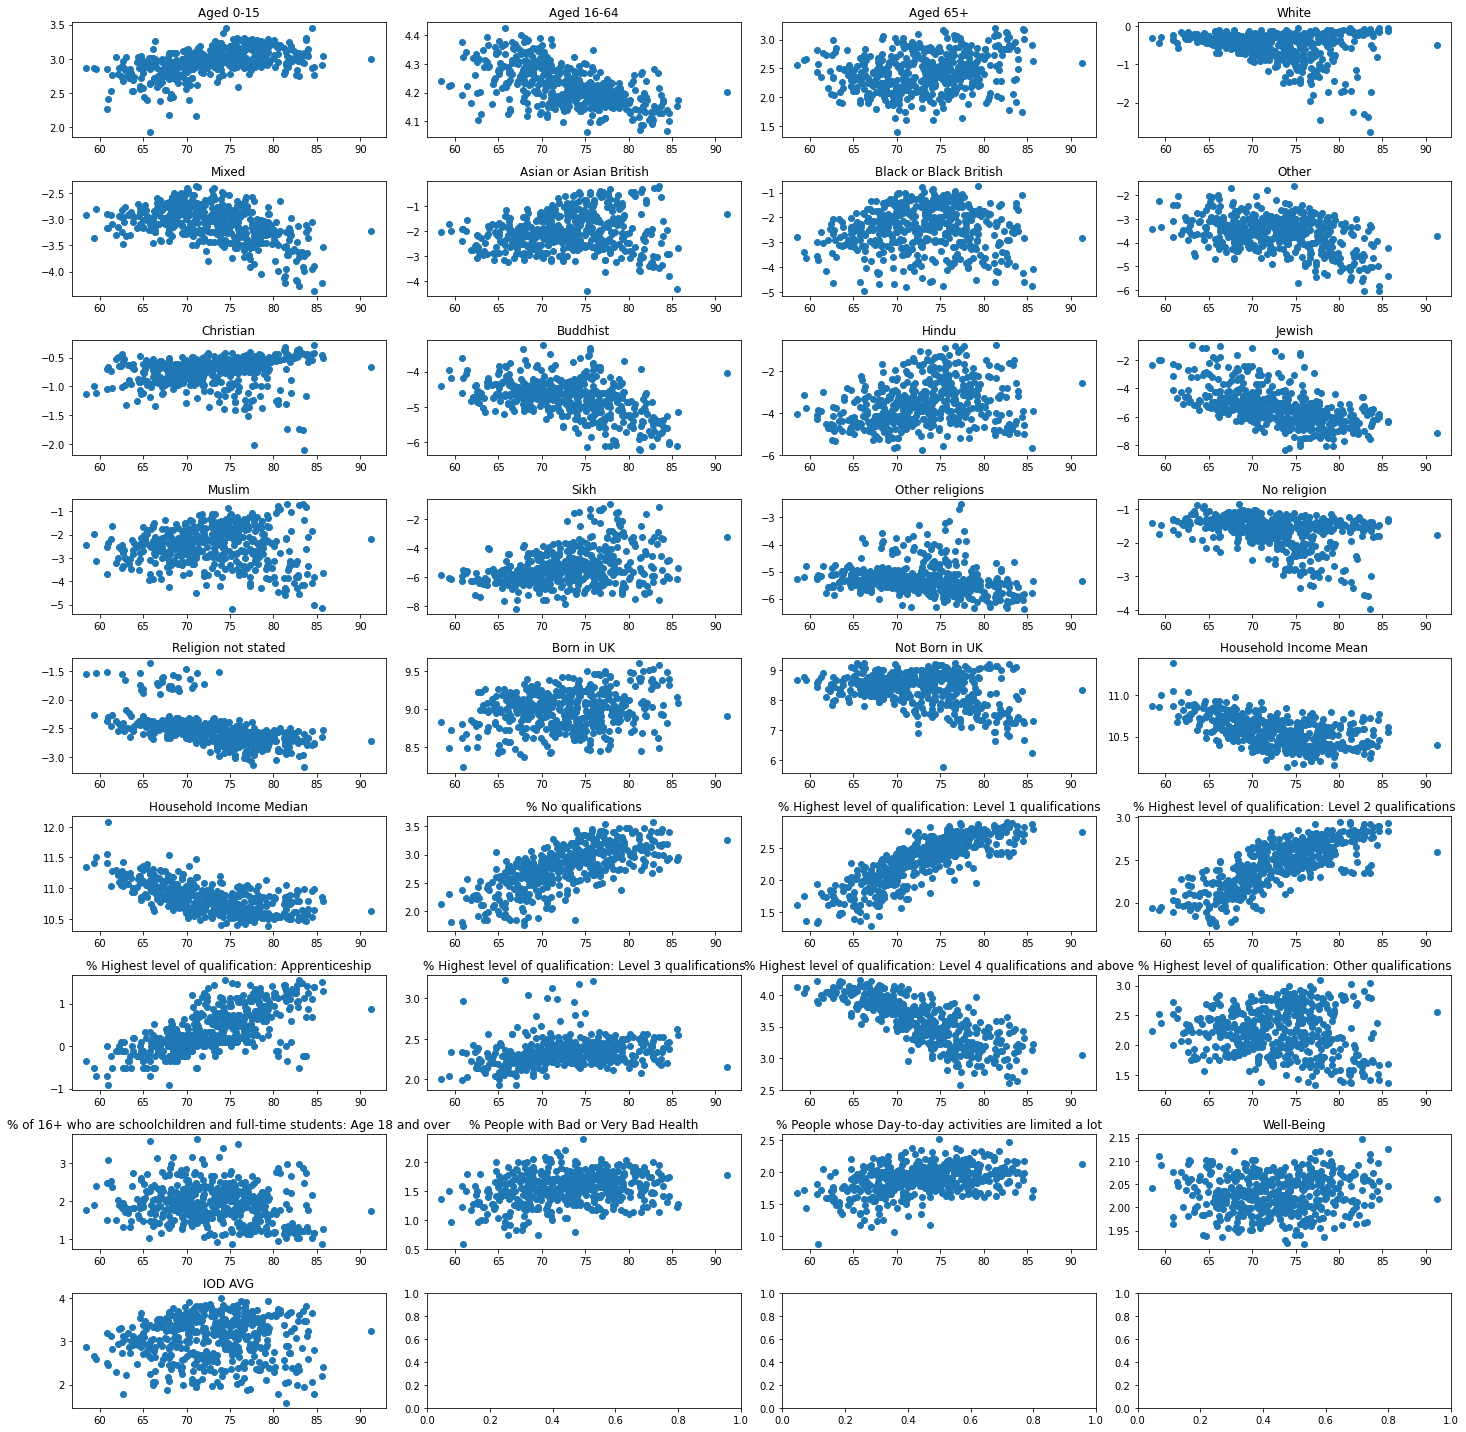

In [81]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas_log['energy_carb'], df_ward_atlas_log[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

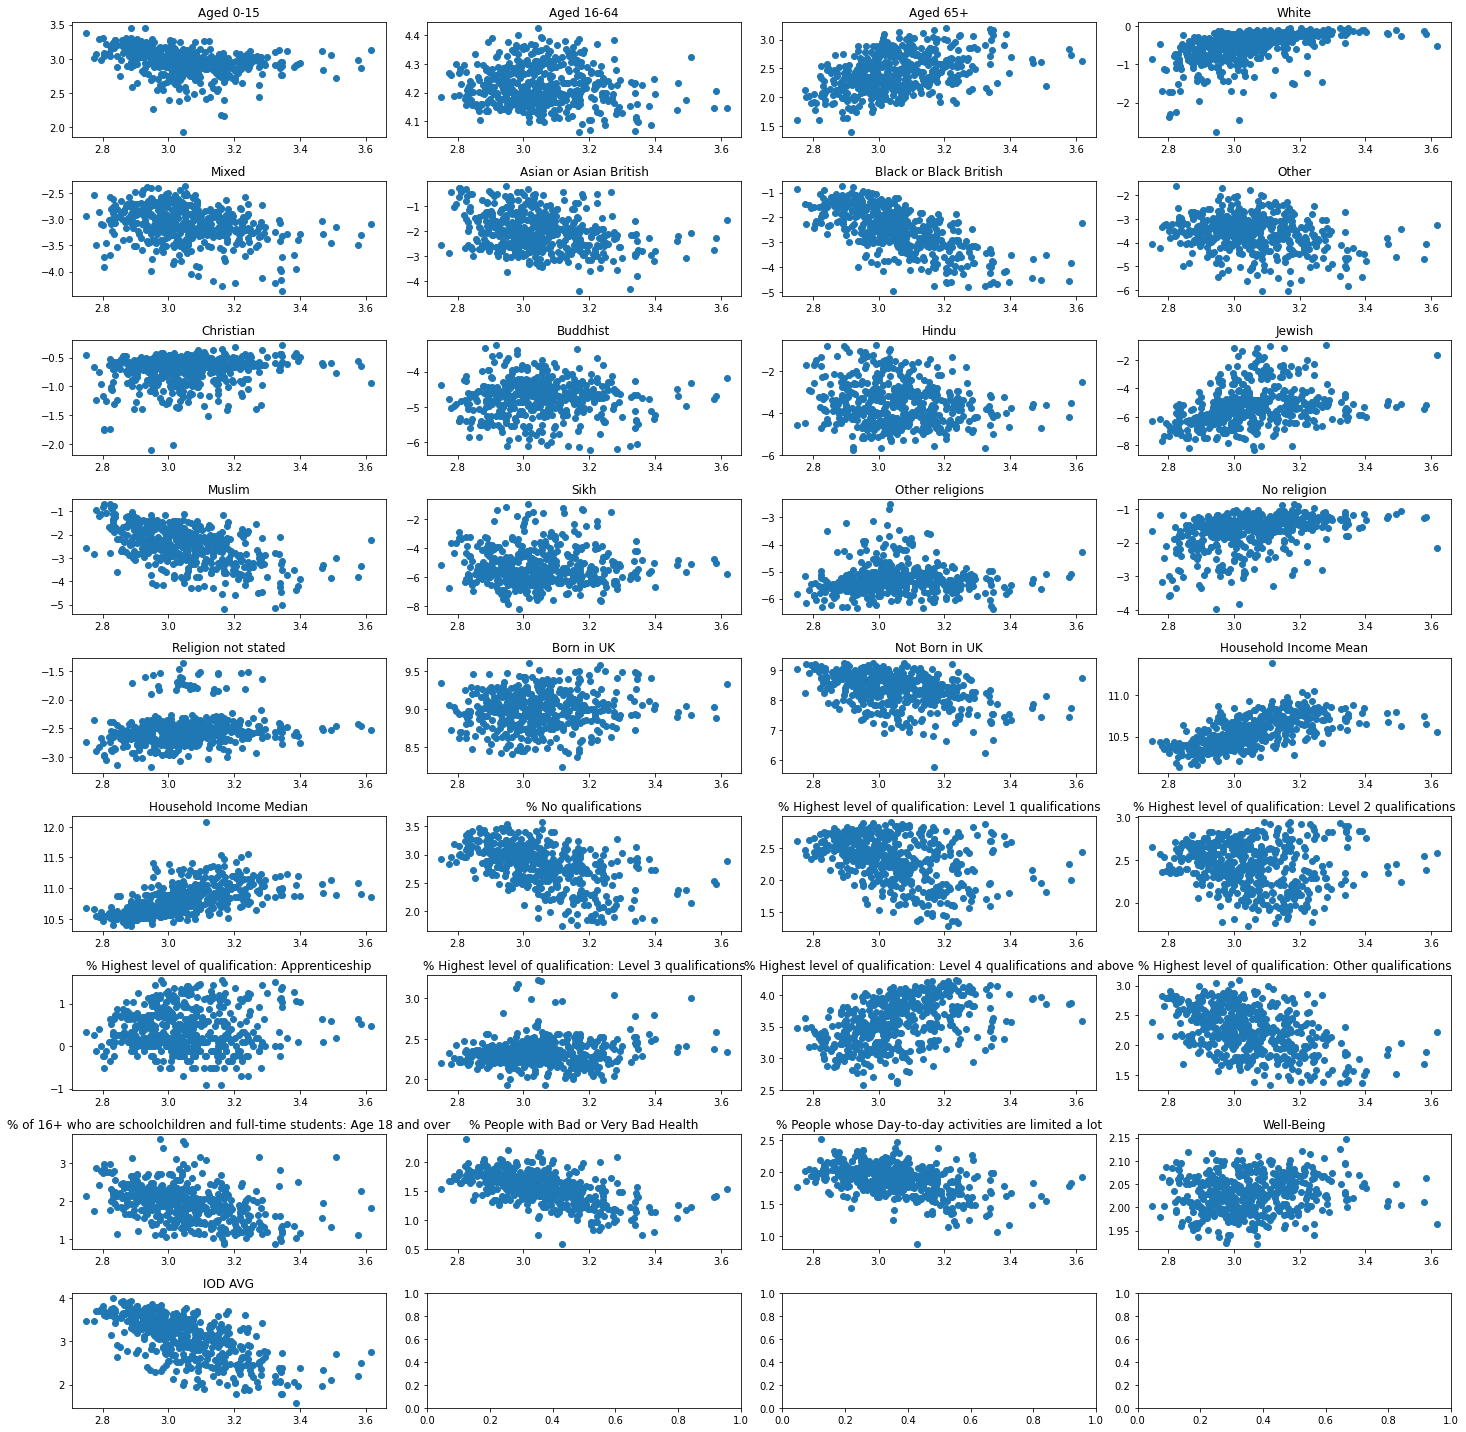

In [82]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas_log['energy_fibre'], df_ward_atlas_log[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

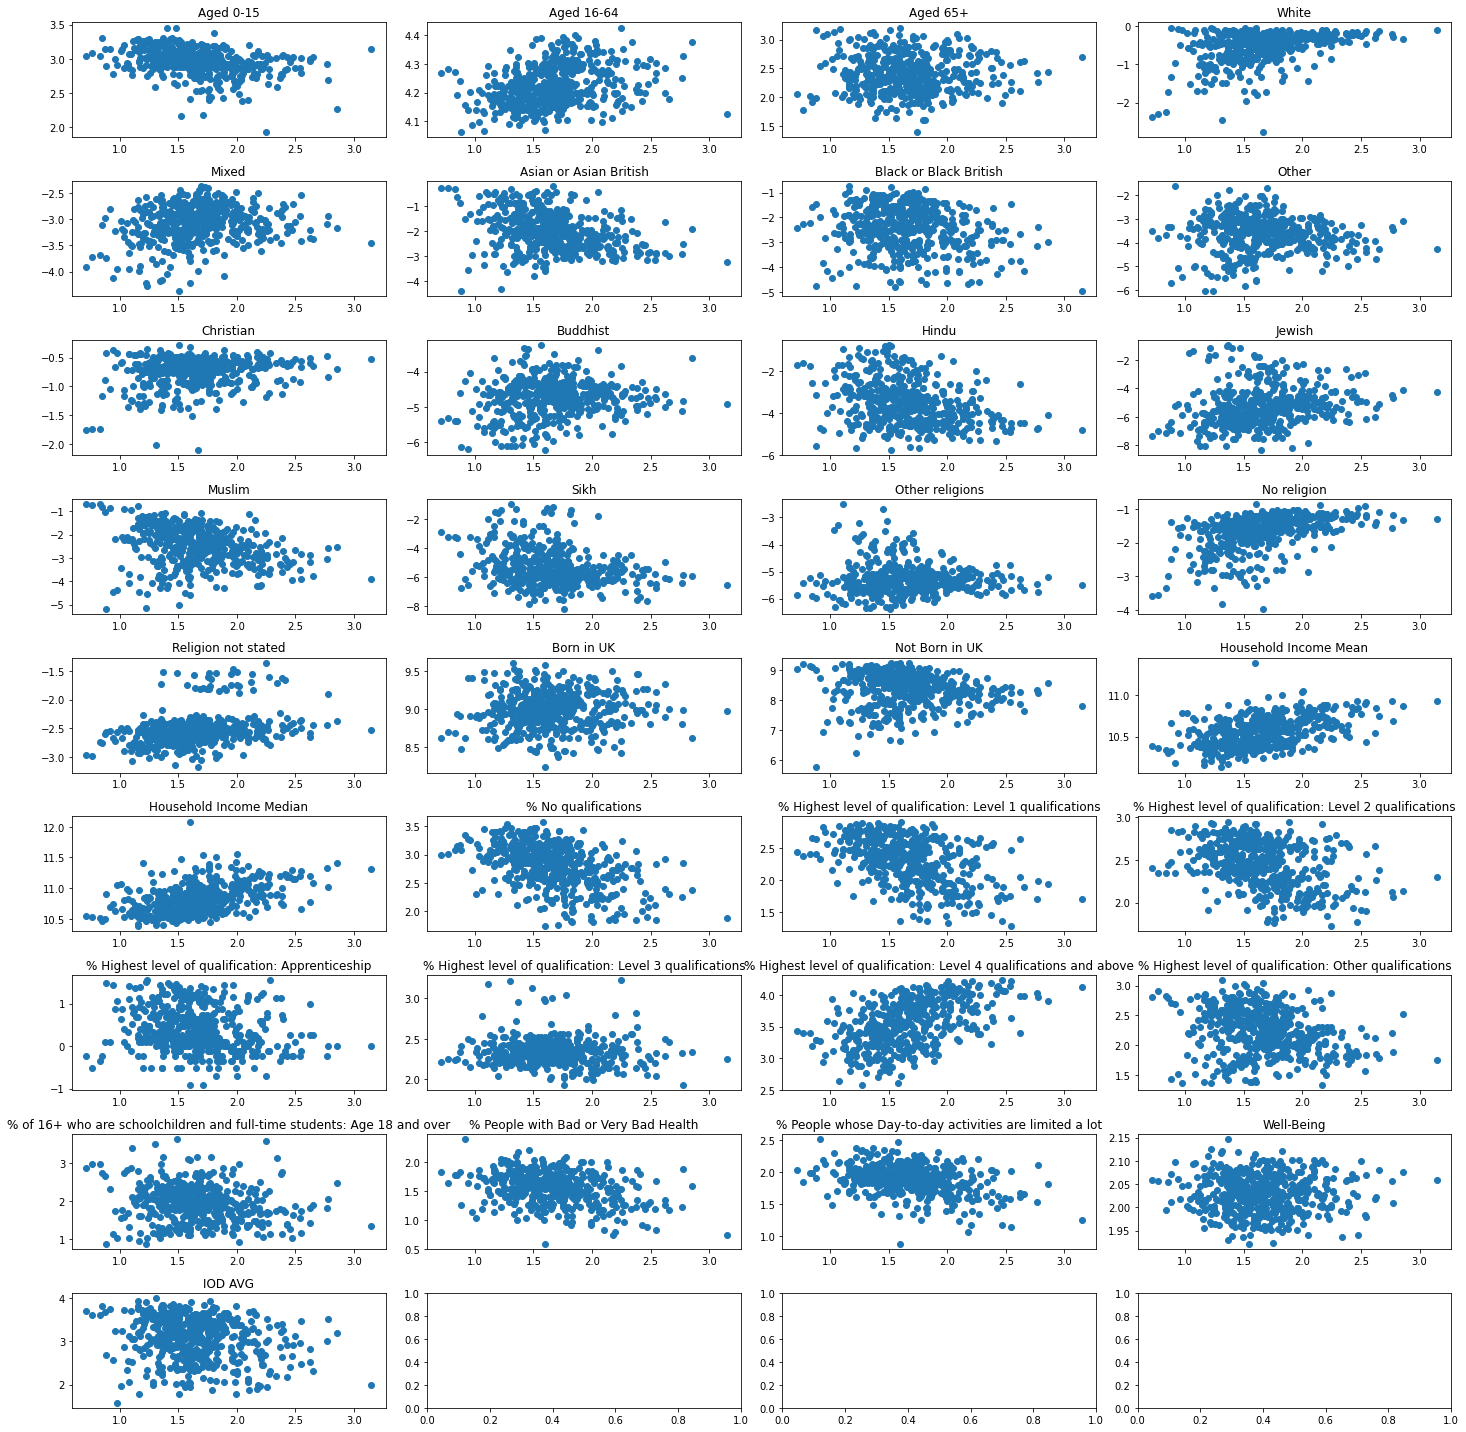

In [83]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas_log['energy_alcohol'], df_ward_atlas_log[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

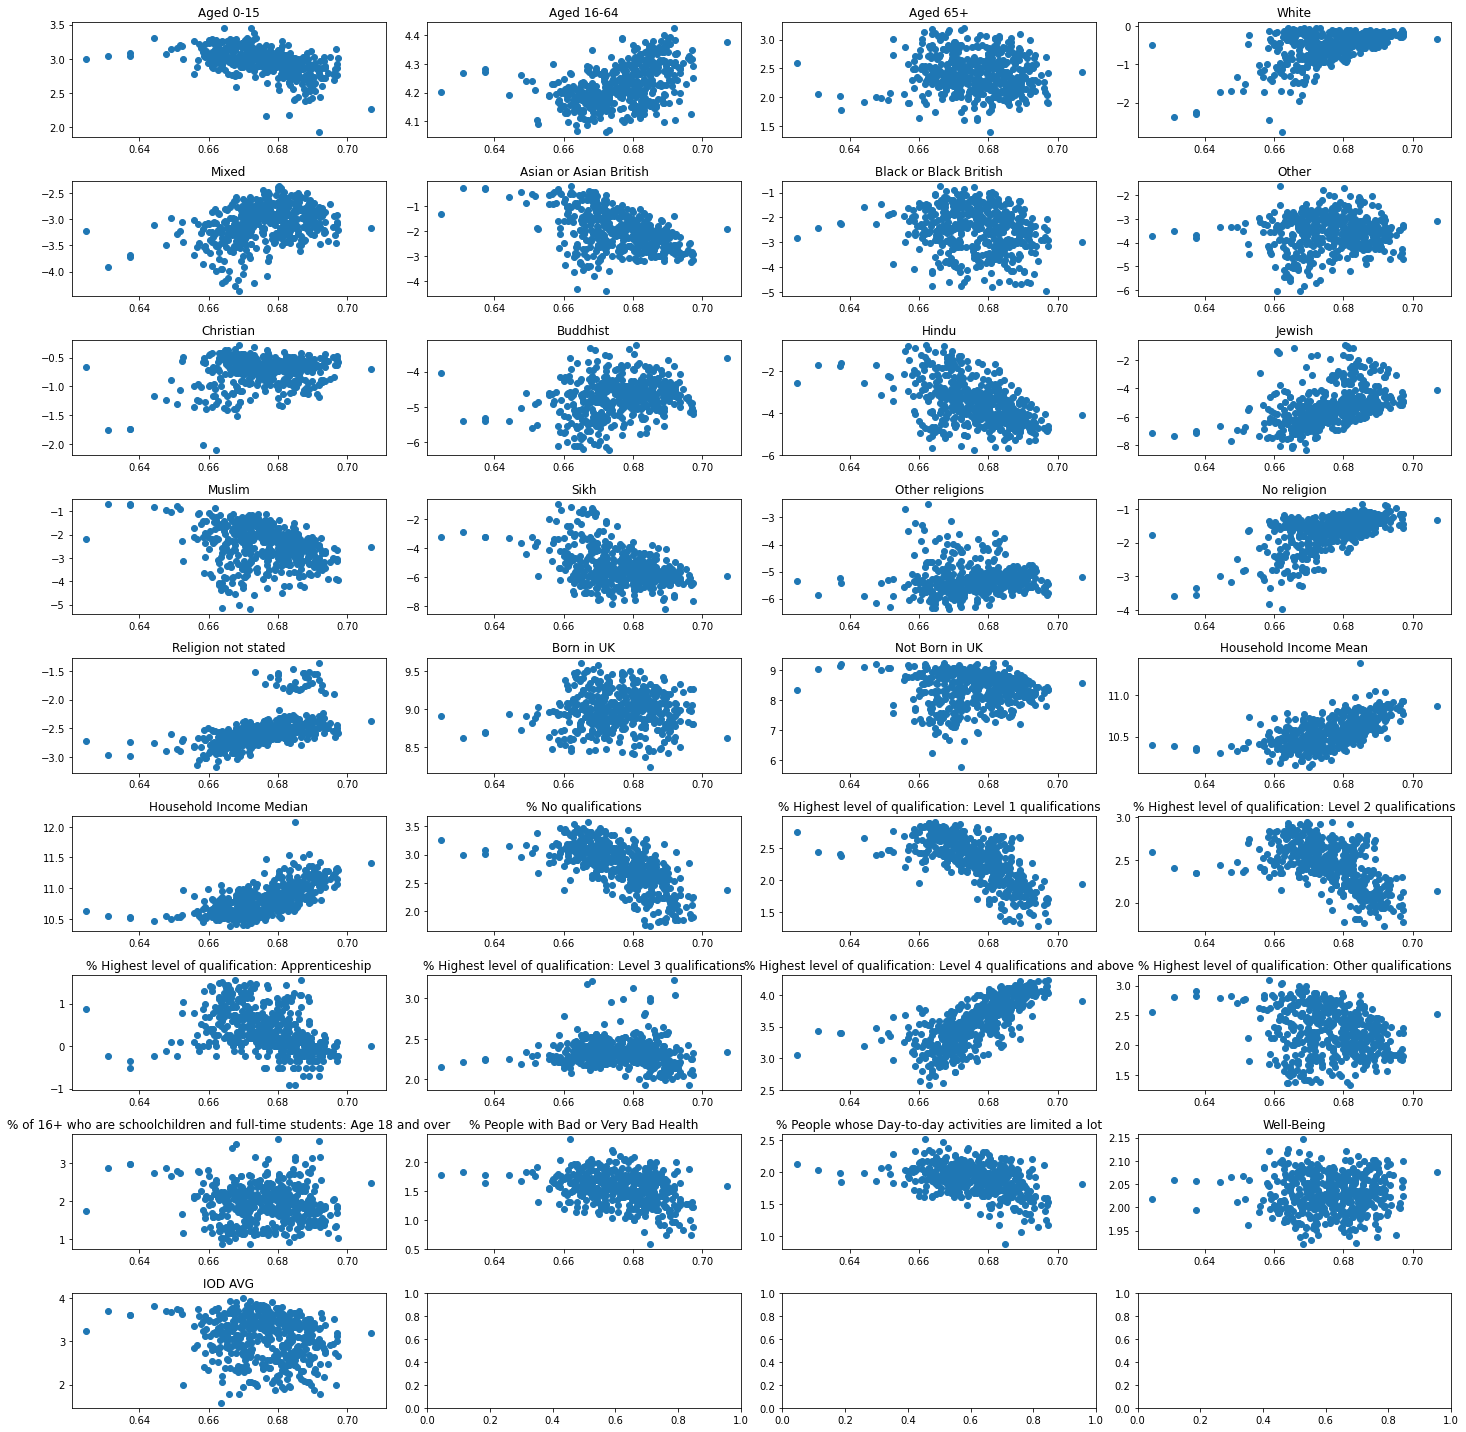

In [84]:
# TODO refactor into function
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 20))
axs_flat = axs.flatten()
for idx, column in enumerate(df_atlas.columns.values[2:]):
    axs_flat[idx].scatter(df_ward_atlas_log['h_nutrients_calories_norm'], df_ward_atlas_log[column])
    axs_flat[idx].set_title(column)
fig.tight_layout()
plt.show()

Calculating pearson correlation coefficient between
- `df_atlas_log`
- energy_carb, energy_protein, enery_fat, energy_fibre, energy_alcohol, h_nutrients_calories_norm and food labels

In [85]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [86]:
# calculate the correlations
corr = df_ward_atlas_log.corr(method='spearman')
# calculate p-values
corr_p = df_ward_atlas_log.corr(method=spearmanr_pval)

/home/alex/.local/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [87]:
# select correlations and p-values of interest
corr_selected = corr[['energy_carb', 'energy_protein', 'energy_fat',\
                      'energy_fibre', 'energy_alcohol', 'h_nutrients_calories_norm']].loc[df_atlas_log.columns.values]
corr_p_selected = corr_p[['energy_carb', 'energy_protein', 'energy_fat',\
                      'energy_fibre', 'energy_alcohol', 'h_nutrients_calories_norm']].loc[df_atlas_log.columns.values]


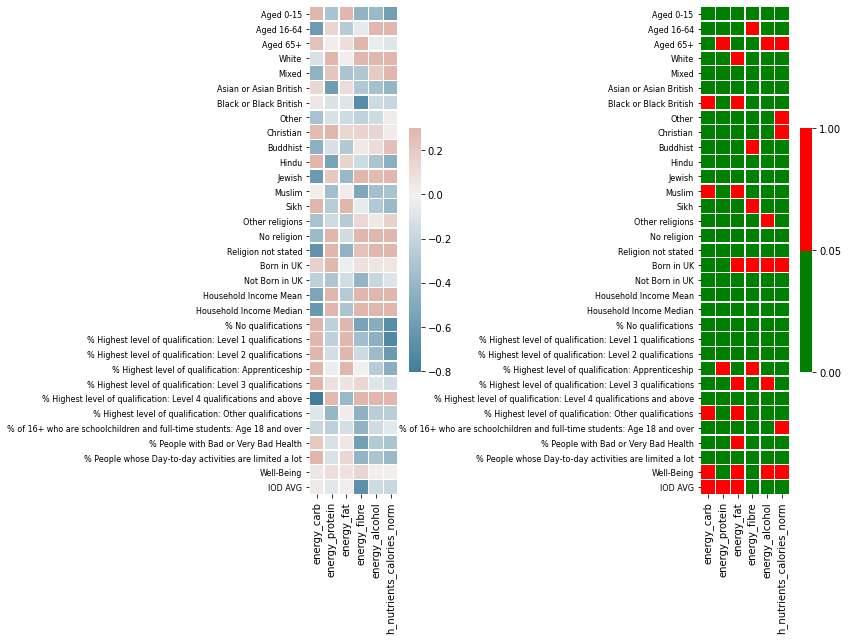

In [88]:
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# plot correlations for logtransformed values

# Set up the matplotlib figure
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
b = sns.heatmap(corr_selected, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
b.set_yticklabels(b.get_yticklabels(), size = 8)

import matplotlib
# define custom colormap to show significant p-values
# source: https://stackoverflow.com/questions/62678213/seaborn-heatmap-custom-colormap
colors = ["green", "red"]
boundaries = [0, 0.05, 1]
norm = matplotlib.colors.BoundaryNorm(boundaries=boundaries, ncolors=256)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
b = sns.heatmap(corr_p_selected,
            annot_kws={"size": 11},
            fmt="",
            ax=ax[1],
            vmax=.3,
            cmap=cmap,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            norm=norm,
            square=True)
b.set_yticklabels(b.get_yticklabels(), size = 8)

f.tight_layout()
plt.show()

In [89]:
corr_selected

energy_carb  \
Aged 0-15                                              0.528187   
Aged 16-64                                            -0.596312   
Aged 65+                                               0.242737   
White                                                 -0.118092   
Mixed                                                 -0.437717   
Asian or Asian British                                 0.134826   
Black or Black British                                 0.050866   
Other                                                 -0.327329   
Christian                                              0.279897   
Buddhist                                              -0.451991   
Hindu                                                  0.297993   
Jewish                                                -0.606047   
Muslim                                                 0.017229   
Sikh                                                   0.324243   
Other religions                                       -0.331523   
No religion                                           -0.385015   
Religion not stated                                   -0.654486   
Born in UK                                             0.168419   
Not Born in UK                                        -0.231189   
Household Income Mean                                 -0.525115   
Household Income Median                               -0.615712   
% No qualifications                                    0.711142   
% Highest level of qualification: Level 1 quali...     0.842429   
% Highest level of qualification: Level 2 quali...     0.782832   
% Highest level of qualification: Apprenticeship       0.683967   
% Highest level of qualification: Level 3 quali...     0.299230   
% Highest level of qualification: Level 4 quali...    -0.806978   
% Highest level of qualification: Other qualifi...    -0.080667   
% of 16+ who are schoolchildren and full-time s...    -0.176789   
% People with Bad or Very Bad Health                   0.207670   
% People whose Day-to-day activities are limite...     0.382160   
Well-Being                                             0.053079   
IOD AVG                                                0.043653   

                                                    energy_protein  \
Aged 0-15                                                -0.325536   
Aged 16-64                                                0.139783   
Aged 65+                                                  0.019171   
White                                                     0.477161   
Mixed                                                     0.222172   
Asian or Asian British                                   -0.588531   
Black or Black British                                   -0.102787   
Other                                                    -0.119419   
Christian                                                 0.372712   
Buddhist                                                 -0.121349   
Hindu                                                    -0.546276   
Jewish                                                    0.212813   
Muslim                                                   -0.362346   
Sikh                                                     -0.265084   
Other religions                                          -0.160232   
No religion                                               0.507417   
Religion not stated                                       0.425508   
Born in UK                                                0.289191   
Not Born in UK                                           -0.308085   
Household Income Mean                                     0.344371   
Household Income Median                                   0.337472   
% No qualifications                                      -0.229461   
% Highest level of qualification: Level 1 quali...       -0.228628   
% Highest level of qualification: Level 2 quali...       -0.132576   
% Highest level of qual

To make it easy for ourselves, let's first try to build a model which predicts the amount of energy provided by carbs in the typical food product. Carbs seem to be a good choice, since the correlation coefficient are quite high for multiple features (e.g. `% Highest level of qualification: Level 4 qualifications and above` or `Household Income Median`).

In [90]:
# create training and test set
from sklearn.model_selection import train_test_split

# params
test_size = 0.2
random_state = 0
indep_vars = df_ward_atlas_log[df_atlas_log.columns.values]
depen_vars = df_ward_atlas_log['energy_carb']

X_train, X_test, y_train, y_test = train_test_split(indep_vars, depen_vars, test_size=test_size, random_state=random_state)

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=random_state)
reg.score(X_test, y_test)

0.7382494703075314

In [92]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=random_state)
reg.score(X_test, y_test)

0.746813533957775

`energy_fats` low correlations, try

In [93]:
# params
depen_vars = df_ward_atlas_log['energy_fat']

X_train, X_test, y_train, y_test = train_test_split(indep_vars, depen_vars, test_size=test_size, random_state=random_state)

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=random_state)
reg.score(X_test, y_test)

0.13979434519649525

In [95]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=random_state)
reg.score(X_test, y_test)

0.127088835800643